##  Predicting Online News Popularity 

### Author: NAJMA A
### Organization: Entri Elevate
### Date: 03/12/2024

###  Table of Contents

1. Overview of Problem Statement
2. Objective
3. Data Description
4. Data Collection
5. Data Preprocessing - Data Cleaning
6. Exploratory Data Analysis (EDA)
7. Feature Engineering
8. Feature Selection:
9. Split Data into Training and Testing Sets
10. Feature Scaling
11. Build the ML Model
12. Model Evaluation:
13. Hyperparameter Tuning
14. Save the Model
15. Test with Unseen Data
16. Interpretation of Results (Conclusion)
17. Future Work

## 1. Overview of Problem Statement
Define the problem:The goal is to predict the popularity of online news articles based on their features. Popularity is quantified by the number of shares, making this a regression task.


## 2. Objective
Develop a regression model that accurately predicts article shares based on features such as content metrics, engagement metrics, and publication details.


## 3. Data Description
- Source: UCI Machine Learning Repository  
- Shape: `(39644, 61)`  
- Features: Content-related metrics, engagement statistics, and publishing details.
- Target: `shares`

#### Attribute Information:
     0. url:                           URL of the article (non-predictive)
     1. timedelta:                     Days between the article publication and the dataset acquisition (non-predictive)
     2. n_tokens_title:                Number of words in the title
     3. n_tokens_content:              Number of words in the content
     4. n_unique_tokens:               Rate of unique words in the content
     5. n_non_stop_words:              Rate of non-stop words in the content
     6. n_non_stop_unique_tokens:      Rate of unique non-stop words in the content
     7. num_hrefs:                     Number of links
     8. num_self_hrefs:                Number of links to other articles published by Mashable
     9. num_imgs:                      Number of images
    10. num_videos:                    Number of videos
    11. average_token_length:          Average length of the words in the content
    12. num_keywords:                  Number of keywords in the metadata
    13. data_channel_is_lifestyle:     Is data channel 'Lifestyle'?
    14. data_channel_is_entertainment: Is data channel 'Entertainment'?
    15. data_channel_is_bus:           Is data channel 'Business'?
    16. data_channel_is_socmed:        Is data channel 'Social Media'?
    17. data_channel_is_tech:          Is data channel 'Tech'?
    18. data_channel_is_world:         Is data channel 'World'?
    19. kw_min_min:                    Worst keyword (min. shares)
    20. kw_max_min:                    Worst keyword (max. shares)
    21. kw_avg_min:                    Worst keyword (avg. shares)
    22. kw_min_max:                    Best keyword (min. shares)
    23. kw_max_max:                    Best keyword (max. shares)
    24. kw_avg_max:                    Best keyword (avg. shares)
    25. kw_min_avg:                    Avg. keyword (min. shares)
    26. kw_max_avg:                    Avg. keyword (max. shares)
    27. kw_avg_avg:                    Avg. keyword (avg. shares)
    28. self_reference_min_shares:     Min. shares of referenced articles in Mashable
    29. self_reference_max_shares:     Max. shares of referenced articles in Mashable
    30. self_reference_avg_sharess:    Avg. shares of referenced articles in Mashable
    31. weekday_is_monday:             Was the article published on a Monday?
    32. weekday_is_tuesday:            Was the article published on a Tuesday?
    33. weekday_is_wednesday:          Was the article published on a Wednesday?
    34. weekday_is_thursday:           Was the article published on a Thursday?
    35. weekday_is_friday:             Was the article published on a Friday?
    36. weekday_is_saturday:           Was the article published on a Saturday?
    37. weekday_is_sunday:             Was the article published on a Sunday?
    38. is_weekend:                    Was the article published on the weekend?
    39. LDA_00:                        Closeness to LDA topic 0
    40. LDA_01:                        Closeness to LDA topic 1
    41. LDA_02:                        Closeness to LDA topic 2
    42. LDA_03:                        Closeness to LDA topic 3
    43. LDA_04:                        Closeness to LDA topic 4
    44. global_subjectivity:           Text subjectivity
    45. global_sentiment_polarity:     Text sentiment polarity
    46. global_rate_positive_words:    Rate of positive words in the content
    47. global_rate_negative_words:    Rate of negative words in the content
    48. rate_positive_words:           Rate of positive words among non-neutral tokens
    49. rate_negative_words:           Rate of negative words among non-neutral tokens
    50. avg_positive_polarity:         Avg. polarity of positive words
    51. min_positive_polarity:         Min. polarity of positive words
    52. max_positive_polarity:         Max. polarity of positive words
    53. avg_negative_polarity:         Avg. polarity of negative  words
    54. min_negative_polarity:         Min. polarity of negative  words
    55. max_negative_polarity:         Max. polarity of negative  words
    56. title_subjectivity:            Title subjectivity
    57. title_sentiment_polarity:      Title polarity
    58. abs_title_subjectivity:        Absolute subjectivity level
    59. abs_title_sentiment_polarity:  Absolute polarity level
    60. shares:                        Number of shares (target)


## 4. Data Collection
Load the data into a pandas DataFrame:

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
from scipy.stats import rankdata, norm
from scipy import stats


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [11]:
dataset = pd.read_csv("OnlineNewsPopularity.csv")
df = pd.DataFrame(dataset)

In [12]:
df

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


## 5. Exploratory Data Analysis (EDA)
Perform detailed EDA to understand the data:

In [14]:
# Summary statistics
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [15]:
# Check for null values
print(df.isnull().sum())

url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64


In [16]:
# remove all spaces from columns
cols = [col.strip() for col in df.columns.to_list()]

# replace dataframe colum
df.columns = cols

In [17]:
df['shares']

0         593
1         711
2        1500
3        1200
4         505
         ... 
39639    1800
39640    1900
39641    1900
39642    1100
39643    1300
Name: shares, Length: 39644, dtype: int64

In [18]:
df['shares'].unique()

array([  593,   711,  1500, ..., 34500, 25600, 45000], dtype=int64)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            39644 non-null  object 
 1   timedelta                      39644 non-null  float64
 2   n_tokens_title                 39644 non-null  float64
 3   n_tokens_content               39644 non-null  float64
 4   n_unique_tokens                39644 non-null  float64
 5   n_non_stop_words               39644 non-null  float64
 6   n_non_stop_unique_tokens       39644 non-null  float64
 7   num_hrefs                      39644 non-null  float64
 8   num_self_hrefs                 39644 non-null  float64
 9   num_imgs                       39644 non-null  float64
 10  num_videos                     39644 non-null  float64
 11  average_token_length           39644 non-null  float64
 12  num_keywords                   39644 non-null 

In [20]:
df.shape

(39644, 61)

In [21]:
df = df.drop_duplicates()
print(df.duplicated().sum())

0


In [22]:
df['shares'].value_counts()

shares
1100     2308
1200     2018
1300     1740
1400     1592
1500     1323
         ... 
96100       1
443         1
58100       1
360         1
45000       1
Name: count, Length: 1454, dtype: int64

### 
This function provides a count of occurrences for each unique value in the ' shares' column. It sorts these values in descending order, showing the most frequently occurring values first.
The value 1100 (shares) appears 2308 times in the dataset, making it the most common number of shares.1200 shares occur 2018 times in the dataset, and so on.
The Length: 1454 at the end shows that there are 1454 unique values in the ' shares' column.
This output is helpful for identifying the distribution of the target variable, which may suggest skewness or the presence of frequent and rare values.For regression tasks, it helps understand the range and frequency of the target values.

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


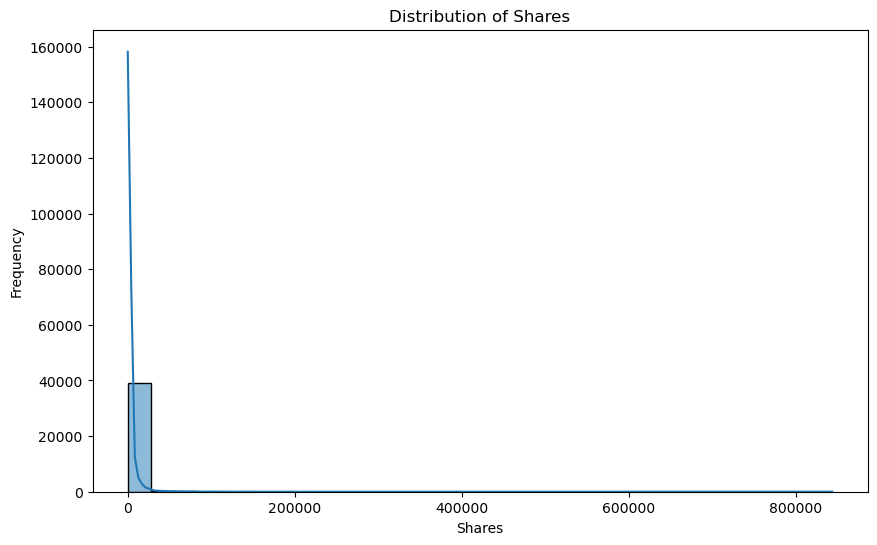

In [24]:
# Visualize data using plots
plt.figure(figsize=(10, 6))
sns.histplot(df['shares'], bins=30, kde=True)
plt.title('Distribution of Shares')
plt.xlabel('Shares')
plt.ylabel('Frequency')
plt.show()

###
The histogram plot of the shares variable shows a highly skewed distribution. Here are the key observations:
Right Skewed (Positive Skew): The distribution is heavily skewed to the right. Most articles have a low number of shares, while only a few have very high shares, creating a long tail on the right side of the plot.

High Frequency of Low Shares: The majority of articles fall into the low share count range (close to 0), indicating that most articles do not receive high popularity.

Presence of Outliers: There are a few articles with an extremely high number of shares, represented by the long tail extending toward 800,000. These are likely outliers and may need special handling, such as using a log transformation, to normalize the distribution for regression modeling.

Log Transformation Recommendation: Given the skewness, applying a log transformation to shares can help reduce skewness and make the distribution more normal-like, which is often beneficial for modeling.¶

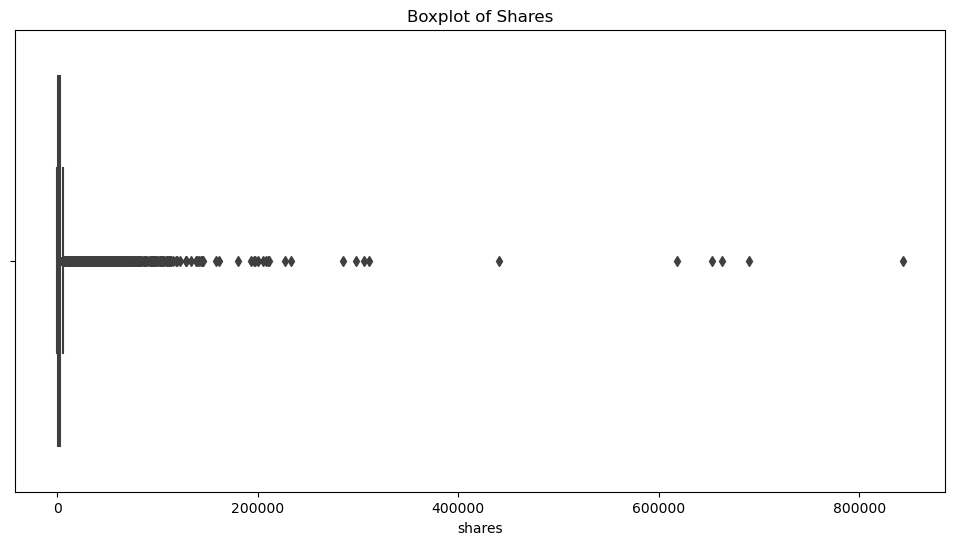

In [26]:
# Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='shares', data=df)
plt.title('Boxplot of Shares')
plt.show()

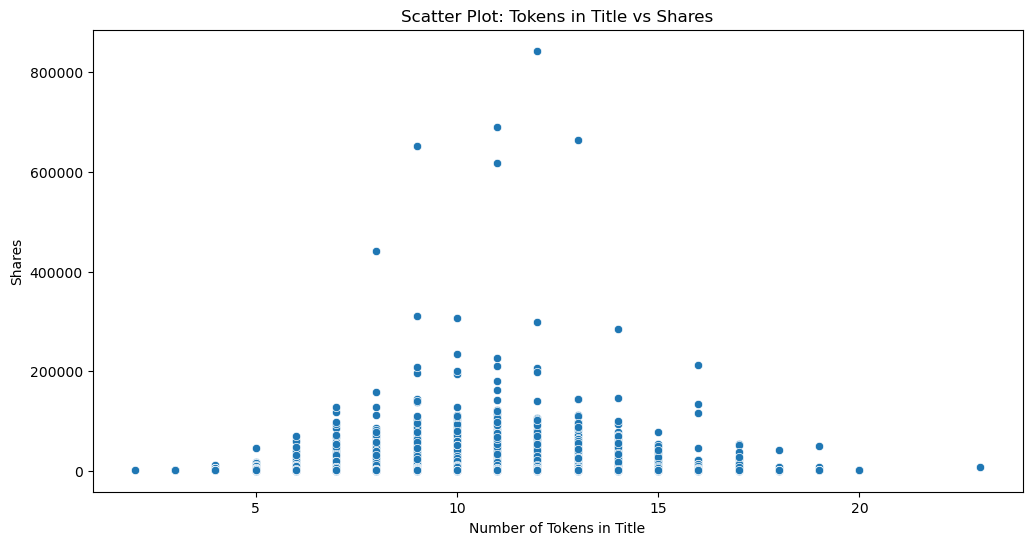

In [27]:
# Scatter plot (assuming we have a numerical column to compare)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='n_tokens_title', y='shares', data=df)
plt.title('Scatter Plot: Tokens in Title vs Shares')
plt.xlabel('Number of Tokens in Title')
plt.ylabel('Shares')
plt.show()

###
This scatter plot visualizes the relationship between the number of tokens (words) in the title of an article and the number of shares it receives. Distribution of Shares: The number of shares varies widely across different token counts in titles. The highest concentration of shares seems to fall below the 200,000 mark, though a few outliers reach as high as over 800,000 shares.

Optimal Range of Tokens: The scatter plot shows that most articles tend to have between 5 and 15 tokens in their titles. Additionally, there appears to be a slight concentration of higher share counts for titles with around 9-12 tokens.

Outliers: There are notable outliers with exceptionally high shares across different title lengths, indicating that some articles perform very well regardless of title length.

In summary, while the number of tokens in the title doesn’t directly correlate with a clear increase or decrease in shares, there may be an optimal range (roughly 9-12 tokens) where higher engagement (in terms of shares) is more common. This could suggest that titles that are neither too short nor too long might engage readers more effectively.

In [29]:
''' finding and extracting categorical features '''
# I USED 20 as threshold
count = 0
threshold = 20 # try change and see difference
categorical_features = []
numerical_features = []
for col in df:
    unique_col_values = len(df[col].unique())
    if unique_col_values < threshold:
        count+=1
        categorical_features.append(col)
    else:
        numerical_features.append(col)
print(f'dataset has {count} values can be considered as categorical values.')

dataset has 15 values can be considered as categorical values.


In [30]:
categorical_features

['num_keywords',
 'data_channel_is_lifestyle',
 'data_channel_is_entertainment',
 'data_channel_is_bus',
 'data_channel_is_socmed',
 'data_channel_is_tech',
 'data_channel_is_world',
 'weekday_is_monday',
 'weekday_is_tuesday',
 'weekday_is_wednesday',
 'weekday_is_thursday',
 'weekday_is_friday',
 'weekday_is_saturday',
 'weekday_is_sunday',
 'is_weekend']

### Plot histogram distribution of each categorical features¶

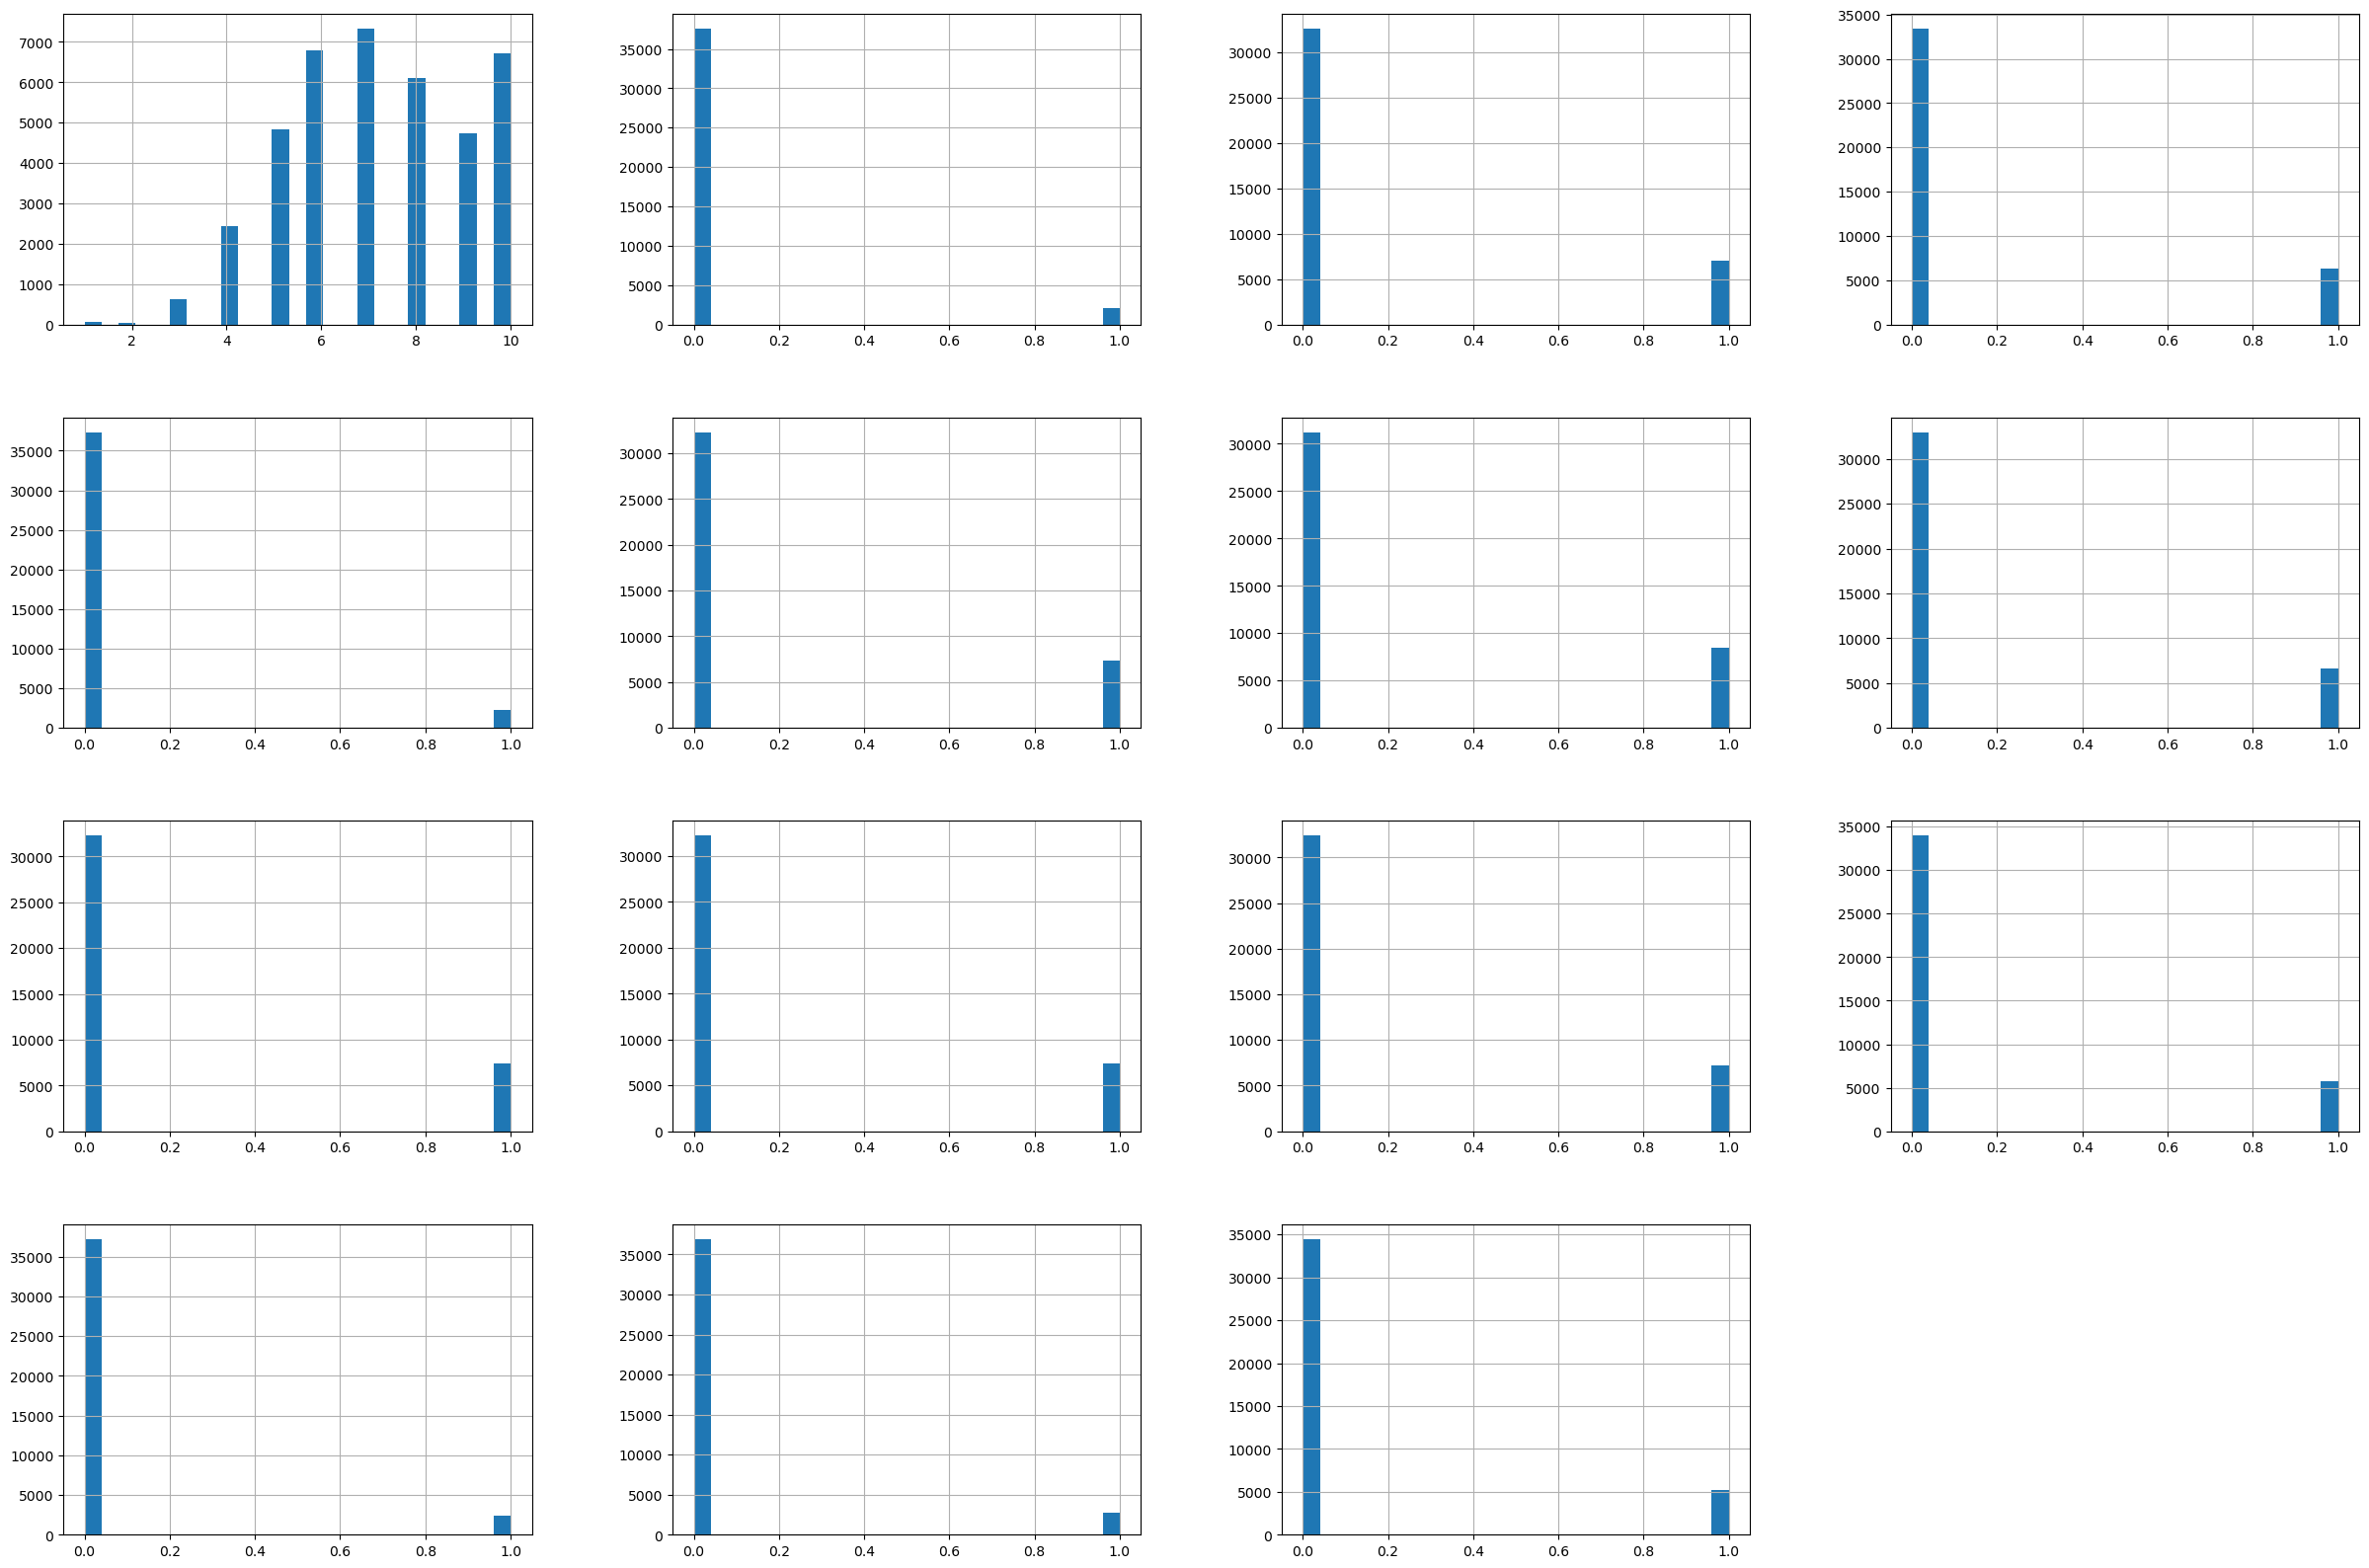

In [32]:
'''df[categorical_features].hist(bins=25, figsize=(30, 20))
# Hide axis titles
axes = axes.flatten()
for ax in axes.flatten():
    ax.set_title('')

plt.show()'''

# Generate histograms for categorical features
axes = df[categorical_features].hist(bins=25, figsize=(30, 20))

# Flatten the axes array (if it's multidimensional)
axes = axes.flatten() if isinstance(axes, (np.ndarray, list)) else [axes]

# Iterate through each axis and customize the title
for ax in axes:
    ax.set_title('')  # Remove axis titles


## Observation from analysis of categorical variable ''
There are multi categorical and 14 binary categorical variables

- Observation in the distribution of binary categorical variable shows high bias to one value (cross validation will help overcoming this issue)
- But the distribution is also somewhat similar in all, may need to handle it later
- Multi-categorical variable looks fine!

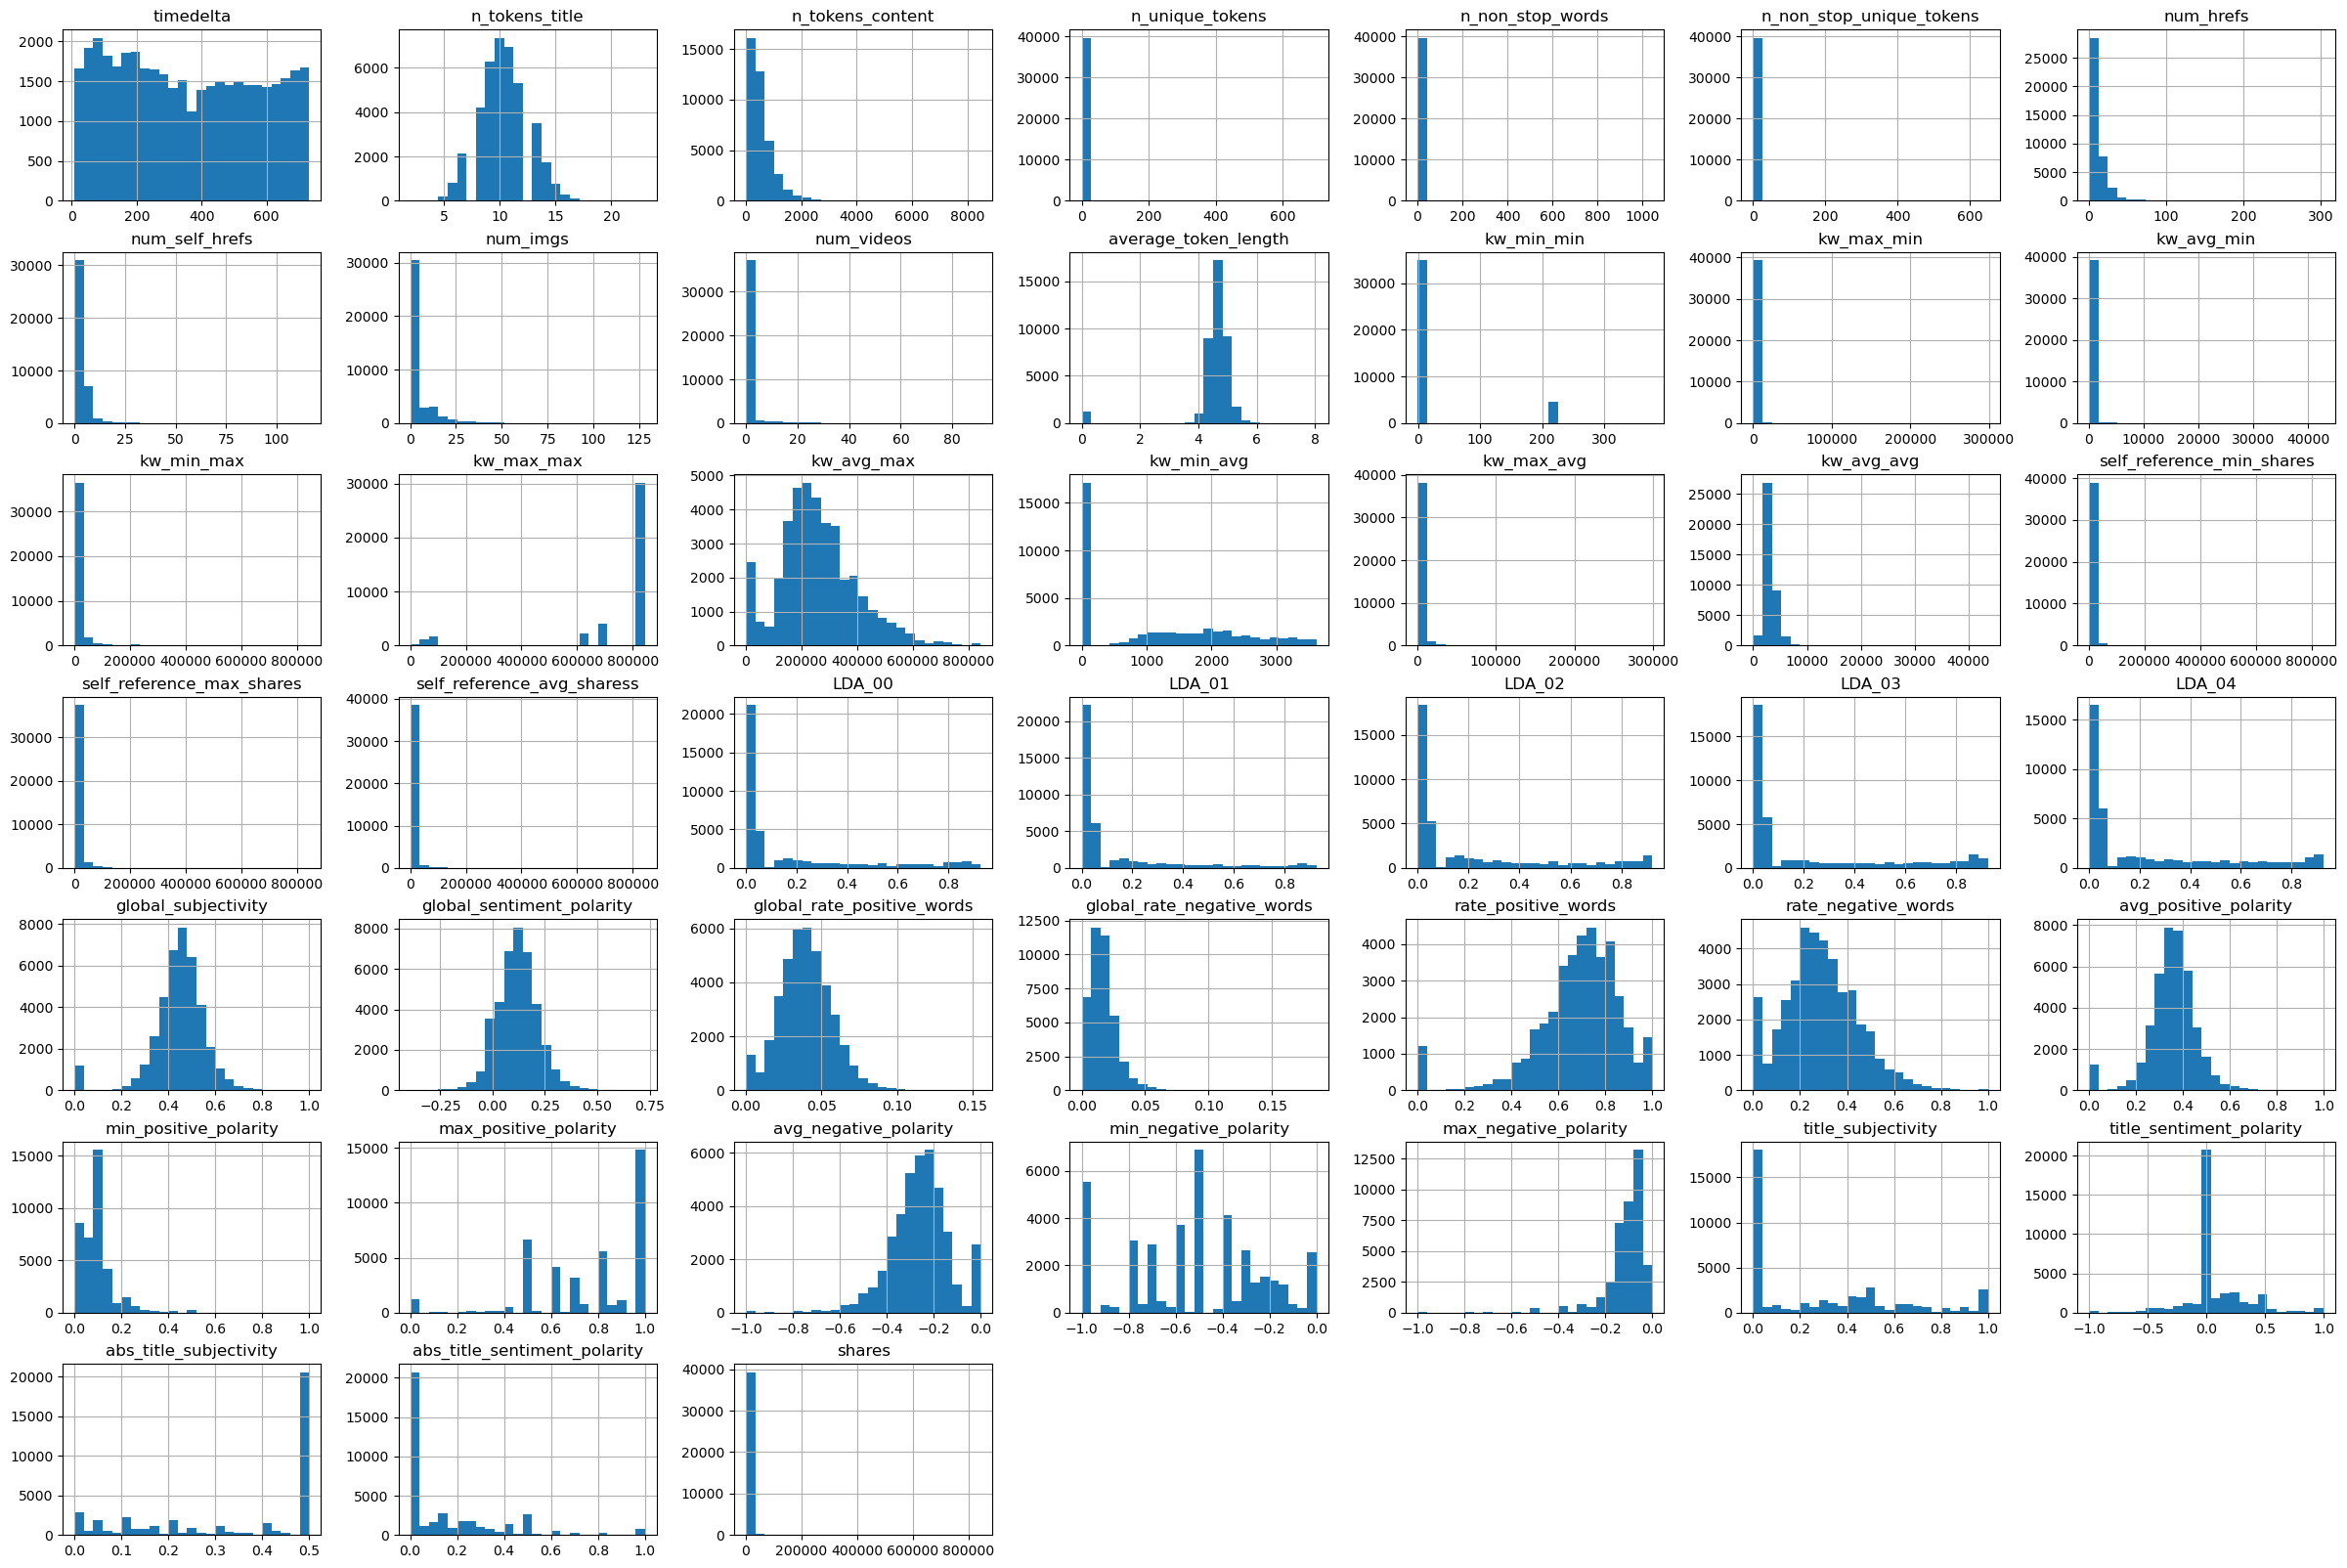

In [34]:
df[numerical_features].hist(bins=25, figsize=(30, 20))
# Hide axis titles
axes = axes.flatten()
for ax in axes.flatten():
    ax.set_title('')

plt.show()

-  some of the features looks okay
- found distributions that looks similar
- highly skewd distributions are there(range, outlier)

In [36]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove 'num_keywords' from the list
if 'num_keywords' in numerical_cols:
    numerical_cols.remove('num_keywords')

# Since weekday indicators and data channel columns are binary (1/0), identify them as categorical
# Example: Assume weekday columns start with 'weekday_' and data channels with 'data_channel_'
categorical_cols = [col for col in df.columns if col.startswith('weekday_') or col.startswith('data_channel_')]
categorical_cols.append('is_weekend')
categorical_cols.append('num_keywords')

# Remove the binary columns from the numerical columns list
numerical_cols = [col for col in numerical_cols if col not in categorical_cols]

print("\nNumerical columns:", numerical_cols)
print("\nCategorical (binary) columns:", categorical_cols)


Numerical columns: ['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity', 'max_positive_polarity', 'avg_negative_polarity', 'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity', 'title_sentiment_polarity', 'abs_title_subjectivity', 'abs_title_sentiment_polarity', 'shares']

Categorical (binary) columns: ['data_channel_is_lifestyle', 'data_channel_is_entertainmen

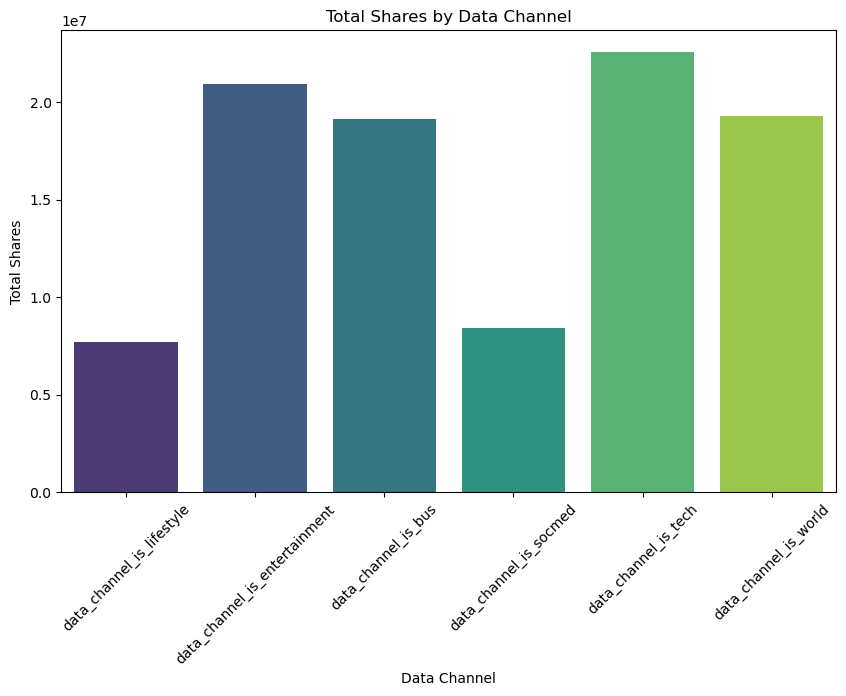

In [37]:

import matplotlib.pyplot as plt
import seaborn as sns

# List of data channel columns
channel_columns = [
    'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 
    'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world'
]

# Calculate the total shares for each channel by summing 'shares' where each channel is active (1)
channel_shares = {channel: df[df[channel] == 1]['shares'].sum() for channel in channel_columns}

# Convert the dictionary to a DataFrame for easier plotting
channel_shares_df = pd.DataFrame(list(channel_shares.items()), columns=['Channel', 'Total Shares'])

# Plot the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=channel_shares_df, x='Channel', y='Total Shares', palette="viridis")
plt.title("Total Shares by Data Channel")
plt.xlabel("Data Channel")
plt.ylabel("Total Shares")
plt.xticks(rotation=45)
plt.show()


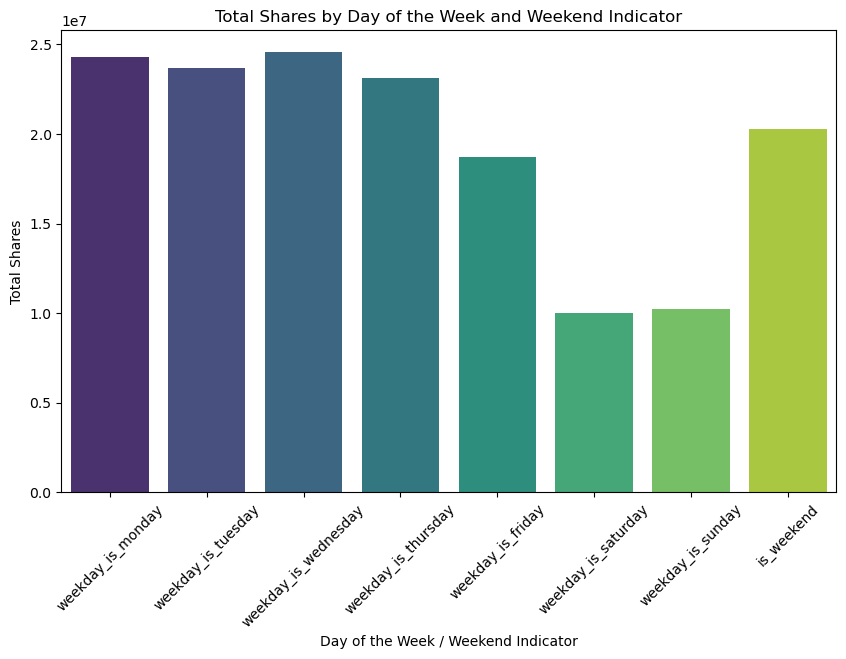

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# List of weekday columns and weekend indicator
weekday_columns = [
    'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday',
    'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend'
]

# Calculate the total shares for each weekday and weekend by summing 'shares' where each column is active (1)
weekday_shares = {day: df[df[day] == 1]['shares'].sum() for day in weekday_columns}

# Convert the dictionary to a DataFrame for easier plotting
weekday_shares_df = pd.DataFrame(list(weekday_shares.items()), columns=['Day', 'Total Shares'])

# Plot the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=weekday_shares_df, x='Day', y='Total Shares', palette="viridis")
plt.title("Total Shares by Day of the Week and Weekend Indicator")
plt.xlabel("Day of the Week / Weekend Indicator")
plt.ylabel("Total Shares")
plt.xticks(rotation=45)
plt.show()

## SKENESS

In [40]:
# checks for the skewness and kurtosis

from scipy.stats import skew, kurtosis

skewness = skew(df['shares'])
kurt = kurtosis(df['shares'])

print(f"Skewness of Shares: {skewness}")
print(f"Kurtosis of Shares: {kurt}")

Skewness of Shares: 33.9625997792866
Kurtosis of Shares: 1832.4413727401281


##
The high skewness and kurtosis values for the shares variable indicate that the data distribution is highly non-normal, with significant asymmetry and extreme outliers. Here's what these specific values mean:

- Value: 33.96
A skewness value greater than +1 indicates a highly positively skewed distribution. In this case, the right tail is much longer than the left tail, meaning there are extreme values (outliers) on the higher end of the shares distribution. The majority of shares values are likely clustered toward smaller values, with a few very large values driving the skewness.

- Value: 1832.44
Kurtosis quantifies the "tailedness" of the distribution. A kurtosis value significantly greater than 3 (excess kurtosis > 0) indicates a leptokurtic distribution, meaning the data has: Heavy tails. Extreme outliers. A sharp peak around the mean. Here, the kurtosis value of 1832 is extraordinarily high, suggesting that the shares variable has numerous extreme outliers.

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Box Plot')

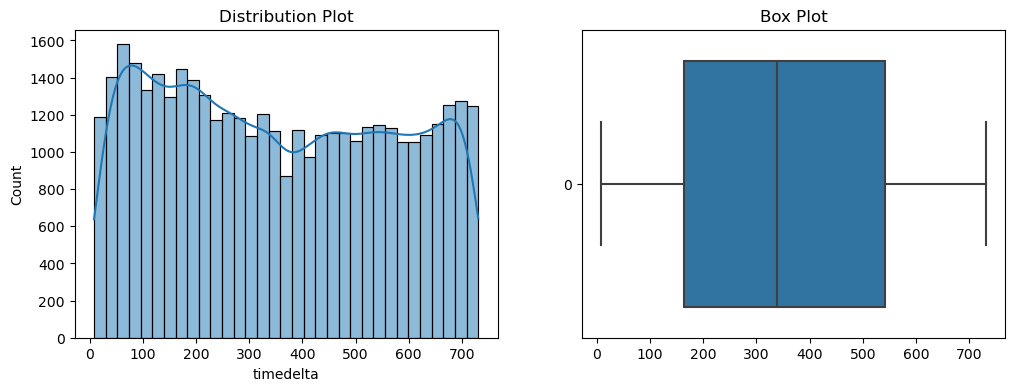

In [42]:
''' handle timedelta '''
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df['timedelta'], kde=True, ax=axes[0])
axes[0].set_title('Distribution Plot')
sns.boxplot(data=df['timedelta'], ax=axes[1], orient='h')
axes[1].set_title('Box Plot')

# timedelta looks evenly distributed

In [43]:
correlation_td = df['timedelta'].corr(df['shares'])
print(f'correlation of timedelta with target variable : {correlation_td}')

correlation of timedelta with target variable : 0.008662287711262597


####  correlation is less, but doesnt mean it has to remove. can further lookinto it while variable selection

## 6. Data Preprocessing 
- There are no missing values and duplicate values

###  Remove unnecessary columns


In [47]:
df= df.drop(columns = 'url')

###  Outlier Detection and Treatment:

In [49]:
import numpy as np

def count_outliers_iqr(df):
    outlier_count = 0  # Initialize counter for total outliers
    column_outlier_counts = {}  # Dictionary to store outlier counts per column

    for col in df.columns:
        if df[col].dtype != 'object':  # Only check numeric columns
            Q1 = np.percentile(df[col], 25)  # 25th percentile (Q1)
            Q3 = np.percentile(df[col], 75)  # 75th percentile (Q3)
            IQR = Q3 - Q1  # Interquartile range
            
            # Define outlier bounds
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Identify outliers for this column
            num_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
            outlier_count += num_outliers
            column_outlier_counts[col] = num_outliers
            
            print(f"Feature: {col} | Outliers: {num_outliers}")
    
    print("\nTotal number of outliers across all columns:", outlier_count)
    return column_outlier_counts, outlier_count

# Usage
column_outlier_counts, total_outliers = count_outliers_iqr(df)

print("\nTotal number of outliers in the dataset:", total_outliers)

Feature: timedelta | Outliers: 0
Feature: n_tokens_title | Outliers: 156
Feature: n_tokens_content | Outliers: 1933
Feature: n_unique_tokens | Outliers: 1604
Feature: n_non_stop_words | Outliers: 2827
Feature: n_non_stop_unique_tokens | Outliers: 1733
Feature: num_hrefs | Outliers: 2169
Feature: num_self_hrefs | Outliers: 2090
Feature: num_imgs | Outliers: 7703
Feature: num_videos | Outliers: 2946
Feature: average_token_length | Outliers: 1681
Feature: num_keywords | Outliers: 51
Feature: data_channel_is_lifestyle | Outliers: 2099
Feature: data_channel_is_entertainment | Outliers: 7057
Feature: data_channel_is_bus | Outliers: 6258
Feature: data_channel_is_socmed | Outliers: 2323
Feature: data_channel_is_tech | Outliers: 7346
Feature: data_channel_is_world | Outliers: 8427
Feature: kw_min_min | Outliers: 4677
Feature: kw_max_min | Outliers: 3661
Feature: kw_avg_min | Outliers: 2081
Feature: kw_min_max | Outliers: 5063
Feature: kw_max_max | Outliers: 9440
Feature: kw_avg_max | Outliers: 

In [50]:
# Function to detect and impute outliers with Q3 using the IQR method
def impute_outliers_with_Q3(df, columns):
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replace outliers with the Q3 of the column
       
        df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), Q3, df[col])

    return df

# Example usage:

# Assuming df is your DataFrame and numerical_cols contains your numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Impute outliers with median
df_imputed = impute_outliers_with_Q3(df, numerical_columns)

# View the data after imputing
print("Data after imputing outliers with Q3:\n", df_imputed.head())



print("Shape of dataset before imputing outliers:",df.shape)
print("Shape of dataset after imputing outliers:",df_imputed.shape)

Data after imputing outliers with Q3:
    timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  \
0      731.0            12.0             219.0         0.663594   
1      731.0             9.0             255.0         0.604743   
2      731.0             9.0             211.0         0.575130   
3      731.0             9.0             531.0         0.503788   
4      731.0            13.0            1072.0         0.415646   

   n_non_stop_words  n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  \
0               1.0                  0.815385        4.0             2.0   
1               1.0                  0.791946        3.0             1.0   
2               1.0                  0.663866        3.0             1.0   
3               1.0                  0.665635        9.0             0.0   
4               1.0                  0.540890       19.0             4.0   

   num_imgs  num_videos  ...  min_positive_polarity  max_positive_polarity  \
0       1.0         0.0

In [51]:
df1 = df_imputed

In [52]:
import numpy as np

def count_outliers_iqr(df1):
    outlier_count = 0  # Initialize counter for total outliers
    column_outlier_counts = {}  # Dictionary to store outlier counts per column

    for col in df1.columns:
        if df1[col].dtype != 'object':  # Only check numeric columns
            Q1 = np.percentile(df1[col], 25)  # 25th percentile (Q1)
            Q3 = np.percentile(df1[col], 75)  # 75th percentile (Q3)
            IQR = Q3 - Q1  # Interquartile range
            
            # Define outlier bounds
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Identify outliers for this column
            num_outliers = df1[(df1[col] < lower_bound) | (df1[col] > upper_bound)].shape[0]
            outlier_count += num_outliers
            column_outlier_counts[col] = num_outliers
            
            print(f"Feature: {col} | Outliers: {num_outliers}")
    
    print("\nTotal number of outliers across all columns:", outlier_count)
    return column_outlier_counts, outlier_count

# Usage
column_outlier_counts, total_outliers = count_outliers_iqr(df1)

print("\nTotal number of outliers in the dataset:", total_outliers)

Feature: timedelta | Outliers: 0
Feature: n_tokens_title | Outliers: 0
Feature: n_tokens_content | Outliers: 0
Feature: n_unique_tokens | Outliers: 189
Feature: n_non_stop_words | Outliers: 1144
Feature: n_non_stop_unique_tokens | Outliers: 349
Feature: num_hrefs | Outliers: 0
Feature: num_self_hrefs | Outliers: 0
Feature: num_imgs | Outliers: 0
Feature: num_videos | Outliers: 0
Feature: average_token_length | Outliers: 144
Feature: num_keywords | Outliers: 0
Feature: data_channel_is_lifestyle | Outliers: 0
Feature: data_channel_is_entertainment | Outliers: 0
Feature: data_channel_is_bus | Outliers: 0
Feature: data_channel_is_socmed | Outliers: 0
Feature: data_channel_is_tech | Outliers: 0
Feature: data_channel_is_world | Outliers: 0
Feature: kw_min_min | Outliers: 0
Feature: kw_max_min | Outliers: 0
Feature: kw_avg_min | Outliers: 0
Feature: kw_min_max | Outliers: 0
Feature: kw_max_max | Outliers: 0
Feature: kw_avg_max | Outliers: 0
Feature: kw_min_avg | Outliers: 0
Feature: kw_max_av

In [53]:

# Function to detect and cap outliers using the IQR method
def cap_outliers_iqr(df1, columns):
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df1[col].quantile(0.25)
        Q3 = df1[col].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap outliers
        df1[col] = np.where(df1[col] < lower_bound, lower_bound, df1[col])
        df1[col] = np.where(df1[col] > upper_bound, upper_bound, df1[col])

    return df1

# Example usage
# Assuming df1 is your DataFrame and numerical_columns contains your numerical columns
numerical_columns = df1.select_dtypes(include=['int64', 'float64']).columns

# Apply capping to outliers after imputing them with the median
df1_capped = cap_outliers_iqr(df1, numerical_columns)

# View the data after capping outliers
print("Data after capping outliers:\n", df1_capped.head())

Data after capping outliers:
    timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  \
0      731.0            12.0             219.0         0.663594   
1      731.0             9.0             255.0         0.604743   
2      731.0             9.0             211.0         0.575130   
3      731.0             9.0             531.0         0.503788   
4      731.0            13.0            1072.0         0.415646   

   n_non_stop_words  n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  \
0               1.0                  0.815385        4.0             2.0   
1               1.0                  0.791946        3.0             1.0   
2               1.0                  0.663866        3.0             1.0   
3               1.0                  0.665635        9.0             0.0   
4               1.0                  0.540890       19.0             4.0   

   num_imgs  num_videos  ...  min_positive_polarity  max_positive_polarity  \
0       1.0         0.0  ...    

In [54]:
df2 = df1_capped

In [55]:
import numpy as np

def count_outliers_iqr(df2):
    outlier_count = 0  # Initialize counter for total outliers
    column_outlier_counts = {}  # Dictionary to store outlier counts per column

    for col in df2.columns:
        if df2[col].dtype != 'object':  # Only check numeric columns
            Q1 = np.percentile(df2[col], 25)  # 25th percentile (Q1)
            Q3 = np.percentile(df2[col], 75)  # 75th percentile (Q3)
            IQR = Q3 - Q1  # Interquartile range
            
            # Define outlier bounds
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Identify outliers for this column
            num_outliers = df2[(df2[col] < lower_bound) | (df2[col] > upper_bound)].shape[0]
            outlier_count += num_outliers
            column_outlier_counts[col] = num_outliers
            
            print(f"Feature: {col} | Outliers: {num_outliers}")
    
    print("\nTotal number of outliers across all columns:", outlier_count)
    return column_outlier_counts, outlier_count

# Usage
column_outlier_counts, total_outliers = count_outliers_iqr(df2)

print("\nTotal number of outliers in the dataset:", total_outliers)

Feature: timedelta | Outliers: 0
Feature: n_tokens_title | Outliers: 0
Feature: n_tokens_content | Outliers: 0
Feature: n_unique_tokens | Outliers: 0
Feature: n_non_stop_words | Outliers: 0
Feature: n_non_stop_unique_tokens | Outliers: 0
Feature: num_hrefs | Outliers: 0
Feature: num_self_hrefs | Outliers: 0
Feature: num_imgs | Outliers: 0
Feature: num_videos | Outliers: 0
Feature: average_token_length | Outliers: 0
Feature: num_keywords | Outliers: 0
Feature: data_channel_is_lifestyle | Outliers: 0
Feature: data_channel_is_entertainment | Outliers: 0
Feature: data_channel_is_bus | Outliers: 0
Feature: data_channel_is_socmed | Outliers: 0
Feature: data_channel_is_tech | Outliers: 0
Feature: data_channel_is_world | Outliers: 0
Feature: kw_min_min | Outliers: 0
Feature: kw_max_min | Outliers: 0
Feature: kw_avg_min | Outliers: 0
Feature: kw_min_max | Outliers: 0
Feature: kw_max_max | Outliers: 0
Feature: kw_avg_max | Outliers: 0
Feature: kw_min_avg | Outliers: 0
Feature: kw_max_avg | Outli

<function matplotlib.pyplot.show(close=None, block=None)>

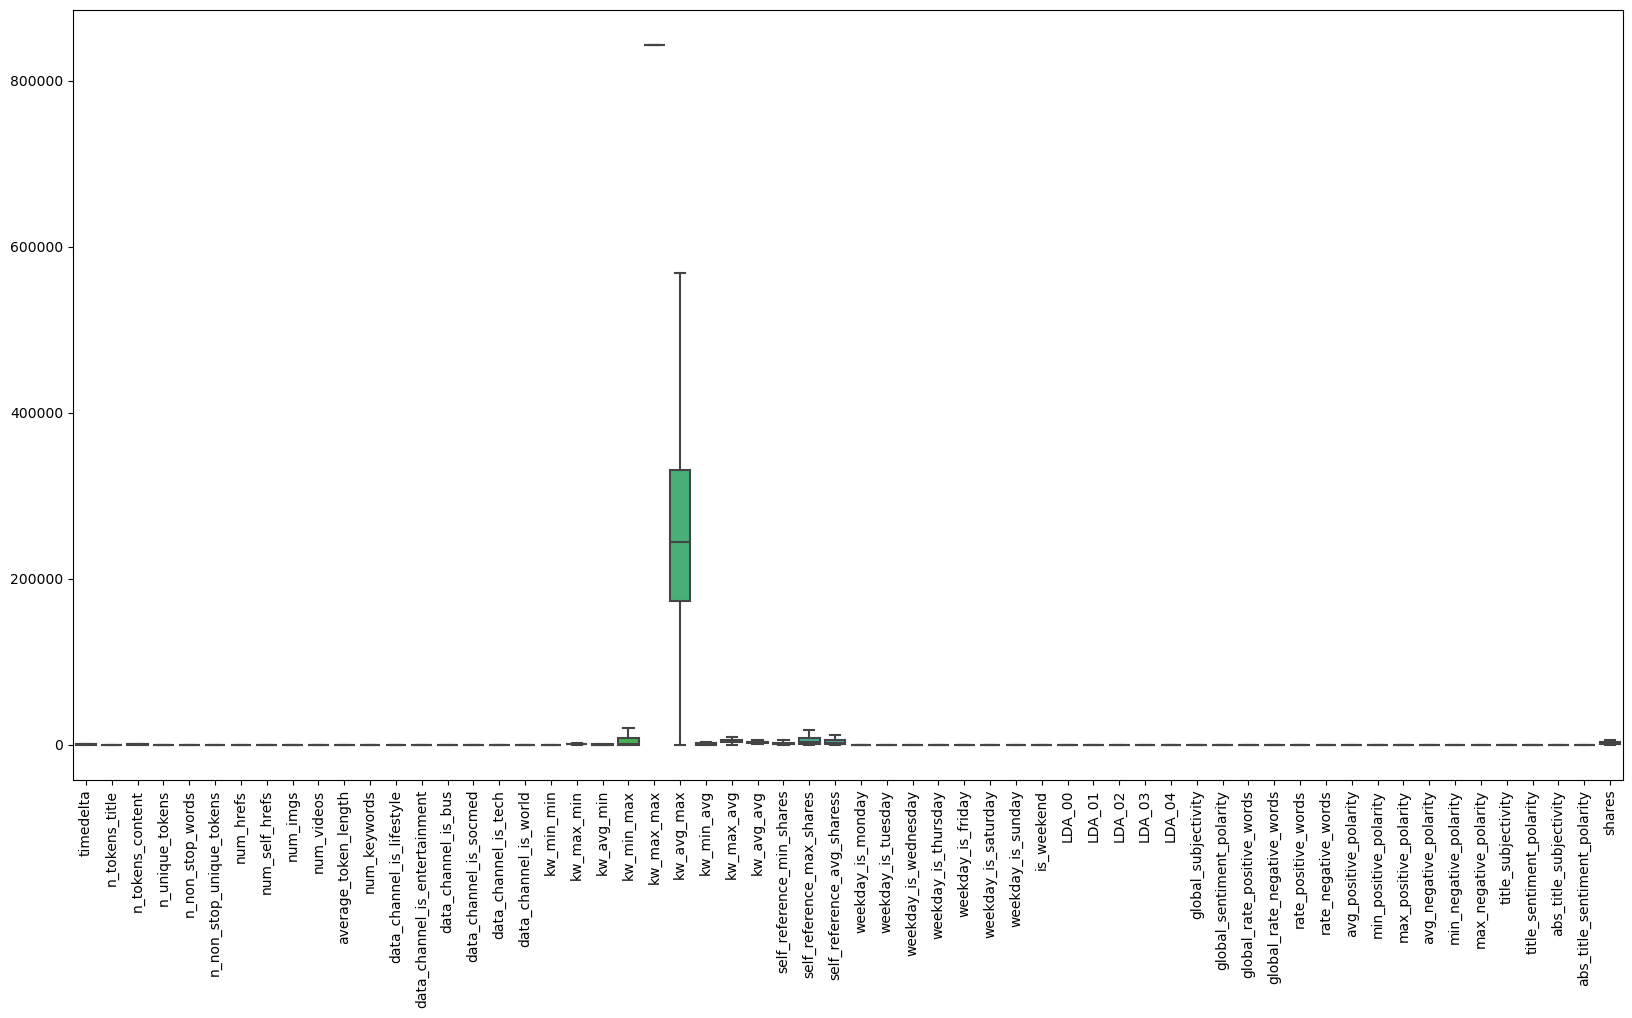

In [56]:
#Now, checking for outliers by ploting the boxplots
plt.figure(figsize = (20,10))
sns.boxplot(data = df2.select_dtypes(include = 'number'))
plt.xticks(rotation = 90)
plt.show

### Correlation

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


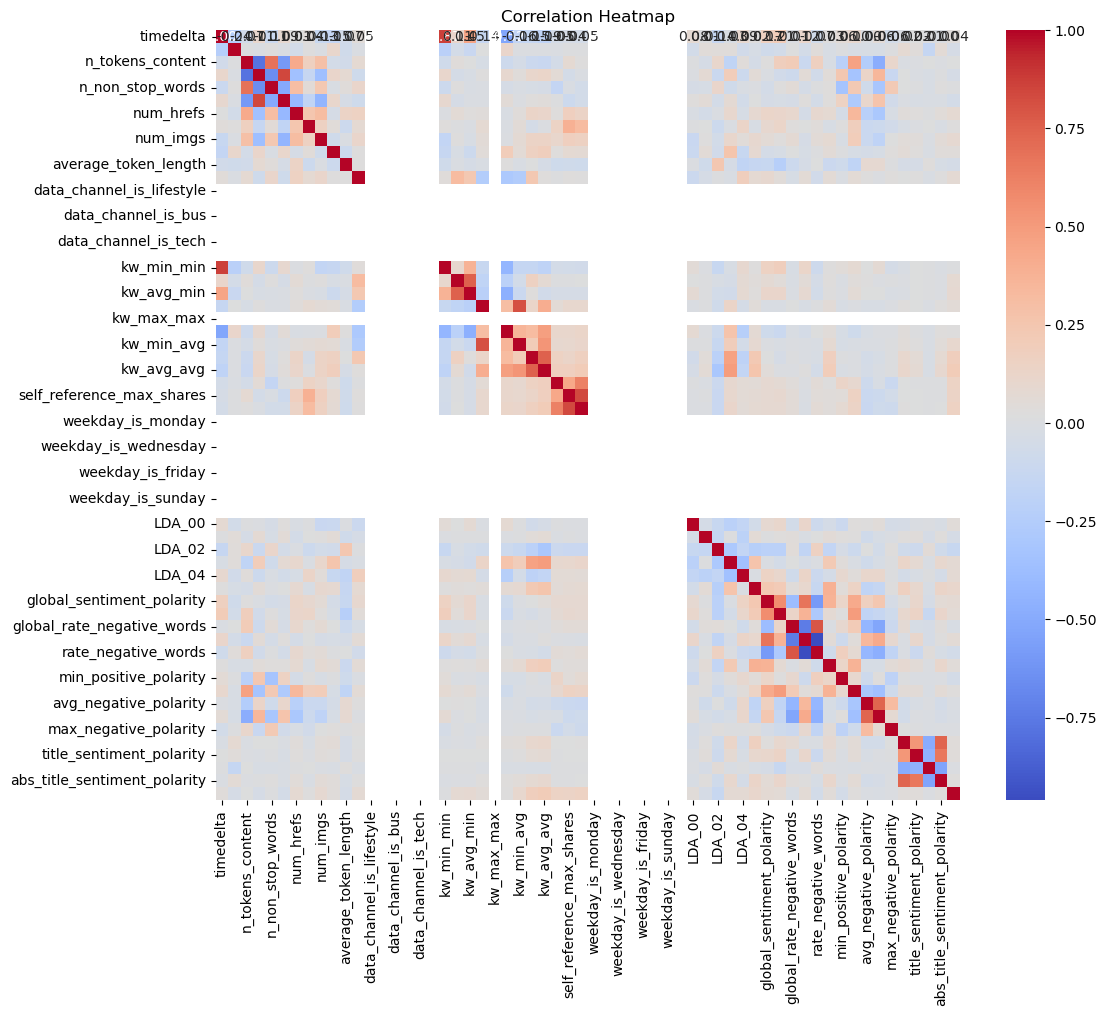

In [58]:
# Exclude non-numeric columns, such as 'Class'
numeric_data = df2.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [59]:
import pandas as pd

# Calculate the correlation matrix
numeric_data = df2.select_dtypes(include = ['int64','float64'])
correlation_matrix = numeric_data.corr().abs()
correlation_matrix

#plt.figure(figsize = (12,10))
# sns.heatmap(correlation_matrix , annot = True , cmap = 'coolwarm' , square = True , linewidth = .5)
#plt.show()

# Set the thresholds for high correlation
lower_threshold_positive = 0.97
upper_threshold_positive = 1.0
lower_threshold_negative = -1.0
upper_threshold_negative = -0.97

# Find pairs of features with correlation between 0.97 and 1, or -1 and -0.97
high_correlation = correlation_matrix[
    ((correlation_matrix >= lower_threshold_positive) & (correlation_matrix < upper_threshold_positive)) |
    ((correlation_matrix <= upper_threshold_negative) & (correlation_matrix > lower_threshold_negative))
]

# Print the feature names and their correlations in a descriptive format
for feature_1, feature_2, correlation in high_correlation.stack().reset_index().values:
    print(f"The correlation between {feature_1} and {feature_2} is {correlation:.2f}.")

### Skewness


In [61]:
# Check skewness of numerical columns
numerical_features = df2.select_dtypes(include=['float64', 'int64']).columns
#numerical_features
print(df2[numerical_features].skew())

timedelta                        0.120504
n_tokens_title                   0.096352
n_tokens_content                 0.775143
n_unique_tokens                  0.067503
n_non_stop_words                 0.000000
n_non_stop_unique_tokens        -0.041499
num_hrefs                        0.942002
num_self_hrefs                   0.546434
num_imgs                         1.185781
num_videos                       1.079535
average_token_length             0.031092
num_keywords                    -0.119867
data_channel_is_lifestyle        0.000000
data_channel_is_entertainment    0.000000
data_channel_is_bus              0.000000
data_channel_is_socmed           0.000000
data_channel_is_tech             0.000000
data_channel_is_world            0.000000
kw_min_min                       0.330201
kw_max_min                       0.442717
kw_avg_min                       0.459754
kw_min_max                       1.288719
kw_max_max                       0.000000
kw_avg_max                       0

In [62]:
import numpy as np
import pandas as pd
from scipy.stats import boxcox


def handle_skewness(df2, threshold=0.5):
    for column in df2.columns:
        skewness = df2[column].skew()

        if skewness > threshold:
            # Positively skewed: apply log or sqrt
            if (df2[column] > 0).all():  # Ensure there are no zero or negative values
                df2[column] = np.log1p(df2[column])  # log(1 + value)
            else:
                df2[column] = np.sqrt(df2[column])  # Square root transformation

        elif skewness < -threshold:
            # Negatively skewed: apply square or Box-Cox
            if (df2[column] >= 0).all():  # Ensure non-negative values for Box-Cox
                df2[column], _ = boxcox(df2[column] + 1)  # Add 1 to avoid zero values
            else:
                df2[column] = df2[column] ** 2  # Square the values

        # No action for moderately skewed data (-0.5 < skewness < 0.5)

    return df2

# Apply to your dataset
data_transformed = handle_skewness(df2)


In [63]:
data_transformed

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,14.798649,0.663594,1.0,0.815385,2.000000,1.414214,1.000000,0.000000,...,0.100000,1.560913,-0.350000,-0.600,-0.200000,0.707107,-0.187500,0.000000,0.433013,6.386879
1,731.0,9.0,15.968719,0.604743,1.0,0.791946,1.732051,1.000000,1.000000,0.000000,...,0.033333,1.560913,-0.118750,-0.125,-0.100000,0.000000,0.000000,1.168618,0.000000,6.568078
2,731.0,9.0,14.525839,0.575130,1.0,0.663866,1.732051,1.000000,1.000000,0.000000,...,0.100000,2.990175,-0.466667,-0.800,-0.133333,0.000000,0.000000,1.168618,0.000000,7.313887
3,731.0,9.0,23.043437,0.503788,1.0,0.665635,3.000000,0.000000,1.000000,0.000000,...,0.136364,1.973298,-0.369697,-0.600,-0.166667,0.000000,0.000000,1.168618,0.000000,7.090910
4,731.0,13.0,32.741411,0.415646,1.0,0.540890,4.358899,2.000000,2.000000,0.000000,...,0.033333,2.990175,-0.220192,-0.500,-0.050000,0.674200,0.136364,0.049258,0.369274,6.226537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,8.0,11.0,18.601075,0.529052,1.0,0.684783,3.000000,2.645751,1.000000,1.000000,...,0.100000,1.759654,-0.260000,-0.500,-0.125000,0.316228,0.000000,0.794965,0.000000,7.496097
39640,8.0,12.0,18.110770,0.696296,1.0,0.885057,3.000000,2.645751,1.732051,1.000000,...,0.136364,1.560913,-0.211111,-0.400,-0.100000,0.547723,0.150000,0.283814,0.500000,7.550135
39641,8.0,10.0,21.023796,0.516355,1.0,0.644128,4.898979,1.000000,2.000000,1.000000,...,0.136364,0.902186,-0.356439,-0.800,-0.166667,0.674200,0.136364,0.049258,0.369274,7.550135
39642,8.0,6.0,26.115130,0.539493,1.0,0.692661,3.162278,1.000000,1.000000,0.000000,...,0.062500,0.902186,-0.205246,-0.500,-0.012500,0.000000,0.000000,1.168618,0.000000,7.003974


In [64]:
df3 = data_transformed

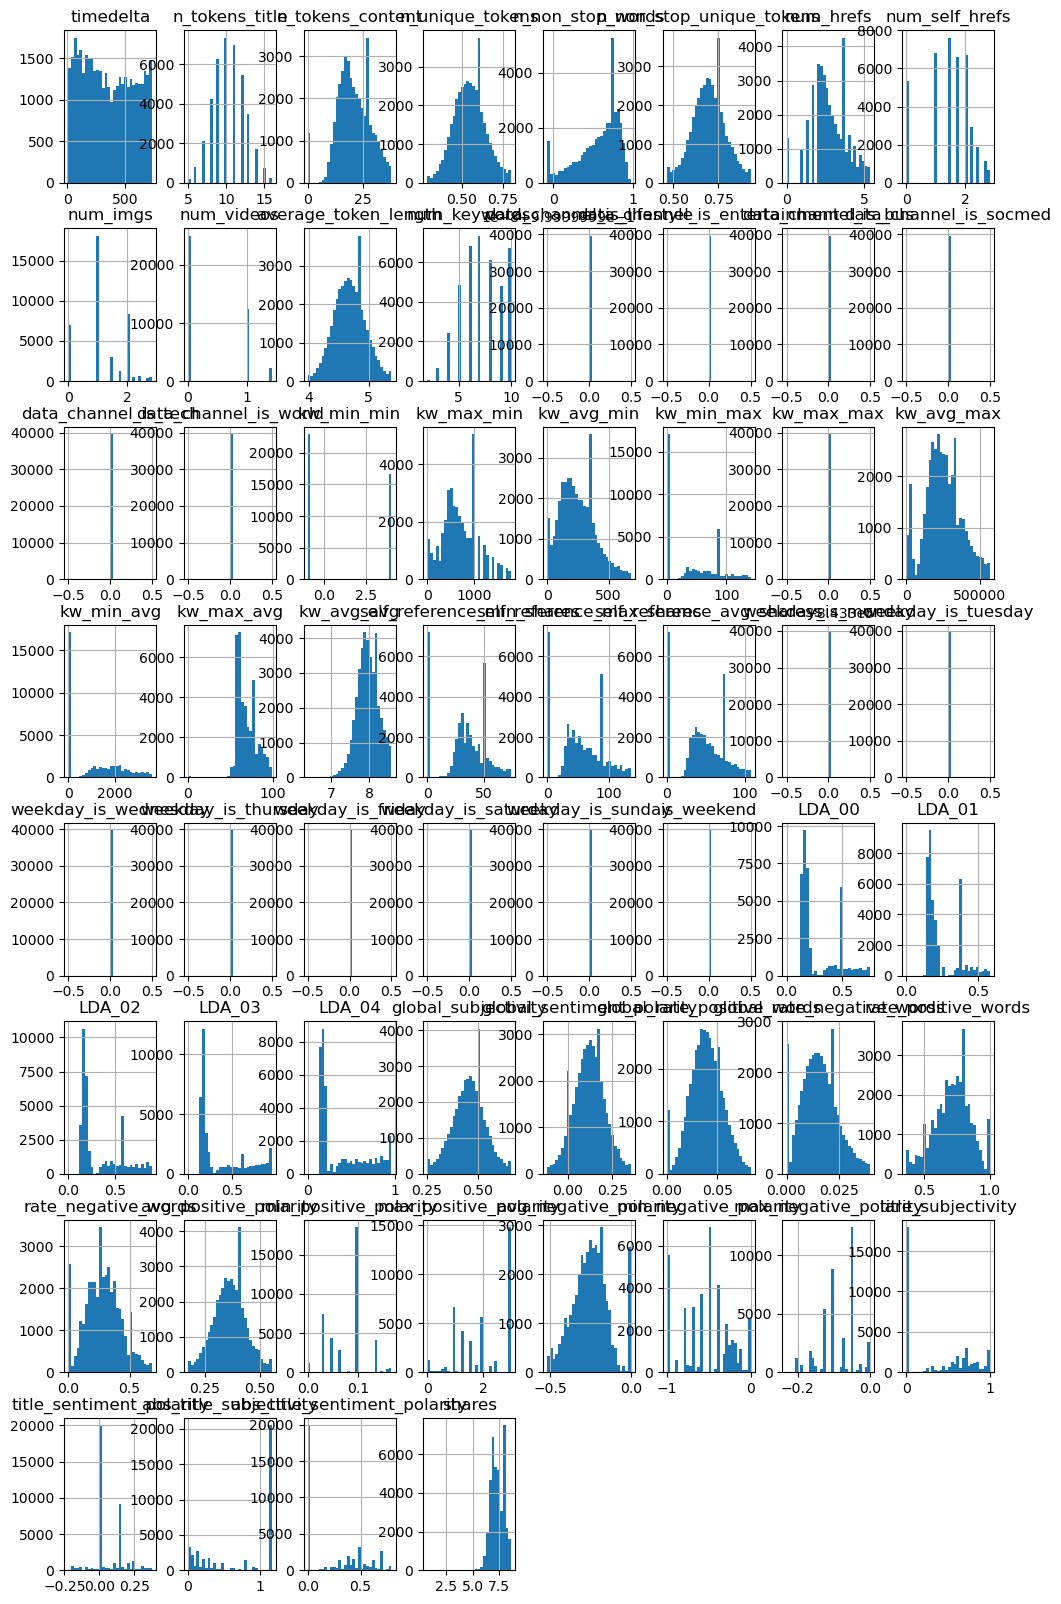

In [65]:
# Plot histograms after transformed features
df3.hist(figsize=(12, 20), bins=30)
plt.show()

In [66]:
import numpy as np

def count_outliers_iqr(df3):
    outlier_count = 0  # Initialize counter for total outliers
    column_outlier_counts = {}  # Dictionary to store outlier counts per column

    for col in df3.columns:
        if df3[col].dtype != 'object':  # Only check numeric columns
            Q1 = np.percentile(df3[col], 25)  # 25th percentile (Q1)
            Q3 = np.percentile(df3[col], 75)  # 75th percentile (Q3)
            IQR = Q3 - Q1  # Interquartile range
            
            # Define outlier bounds
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Identify outliers for this column
            num_outliers = df3[(df3[col] < lower_bound) | (df3[col] > upper_bound)].shape[0]
            outlier_count += num_outliers
            column_outlier_counts[col] = num_outliers
            
            print(f"Feature: {col} | Outliers: {num_outliers}")
    
    print("\nTotal number of outliers across all columns:", outlier_count)
    return column_outlier_counts, outlier_count

# Usage
column_outlier_counts, total_outliers = count_outliers_iqr(df3)

print("\nTotal number of outliers in the dataset:", total_outliers)

Feature: timedelta | Outliers: 0
Feature: n_tokens_title | Outliers: 0
Feature: n_tokens_content | Outliers: 0
Feature: n_unique_tokens | Outliers: 0
Feature: n_non_stop_words | Outliers: 0
Feature: n_non_stop_unique_tokens | Outliers: 0
Feature: num_hrefs | Outliers: 0
Feature: num_self_hrefs | Outliers: 0
Feature: num_imgs | Outliers: 0
Feature: num_videos | Outliers: 0
Feature: average_token_length | Outliers: 0
Feature: num_keywords | Outliers: 0
Feature: data_channel_is_lifestyle | Outliers: 0
Feature: data_channel_is_entertainment | Outliers: 0
Feature: data_channel_is_bus | Outliers: 0
Feature: data_channel_is_socmed | Outliers: 0
Feature: data_channel_is_tech | Outliers: 0
Feature: data_channel_is_world | Outliers: 0
Feature: kw_min_min | Outliers: 0
Feature: kw_max_min | Outliers: 0
Feature: kw_avg_min | Outliers: 0
Feature: kw_min_max | Outliers: 0
Feature: kw_max_max | Outliers: 0
Feature: kw_avg_max | Outliers: 0
Feature: kw_min_avg | Outliers: 0
Feature: kw_max_avg | Outli

In [67]:
# Function to detect and cap outliers using the IQR method
def cap_outliers_iqr(df3, columns):
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df3[col].quantile(0.25)
        Q3 = df3[col].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap outliers
        df3[col] = np.where(df3[col] < lower_bound, lower_bound, df3[col])
        df3[col] = np.where(df3[col] > upper_bound, upper_bound, df3[col])

    return df3

# Example usage
# Assuming df1 is your DataFrame and numerical_columns contains your numerical columns
numerical_columns = df3.select_dtypes(include=['int64', 'float64']).columns

# Apply capping to outliers after imputing them with the median
df3_capped = cap_outliers_iqr(df3, numerical_columns)

# View the data after capping outliers
print("Data after capping outliers:\n", df3_capped.head())

Data after capping outliers:
    timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  \
0      731.0            12.0         14.798649         0.663594   
1      731.0             9.0         15.968719         0.604743   
2      731.0             9.0         14.525839         0.575130   
3      731.0             9.0         23.043437         0.503788   
4      731.0            13.0         32.741411         0.415646   

   n_non_stop_words  n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  \
0               1.0                  0.815385   2.000000        1.414214   
1               1.0                  0.791946   1.732051        1.000000   
2               1.0                  0.663866   1.732051        1.000000   
3               1.0                  0.665635   3.000000        0.000000   
4               1.0                  0.540890   4.358899        2.000000   

   num_imgs  num_videos  ...  min_positive_polarity  max_positive_polarity  \
0       1.0         0.0  ...    

In [68]:
import numpy as np

def count_outliers_iqr(df3_capped):
    outlier_count = 0  # Initialize counter for total outliers
    column_outlier_counts = {}  # Dictionary to store outlier counts per column

    for col in df3_capped.columns:
        if df3_capped[col].dtype != 'object':  # Only check numeric columns
            Q1 = np.percentile(df3_capped[col], 25)  # 25th percentile (Q1)
            Q3 = np.percentile(df3[col], 75)  # 75th percentile (Q3)
            IQR = Q3 - Q1  # Interquartile range
            
            # Define outlier bounds
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Identify outliers for this column
            num_outliers = df3_capped[(df3_capped[col] < lower_bound) | (df3_capped[col] > upper_bound)].shape[0]
            outlier_count += num_outliers
            column_outlier_counts[col] = num_outliers
            
            print(f"Feature: {col} | Outliers: {num_outliers}")
    
    print("\nTotal number of outliers across all columns:", outlier_count)
    return column_outlier_counts, outlier_count

# Usage
column_outlier_counts, total_outliers = count_outliers_iqr(df3_capped)

print("\nTotal number of outliers in the dataset:", total_outliers)

Feature: timedelta | Outliers: 0
Feature: n_tokens_title | Outliers: 0
Feature: n_tokens_content | Outliers: 0
Feature: n_unique_tokens | Outliers: 0
Feature: n_non_stop_words | Outliers: 0
Feature: n_non_stop_unique_tokens | Outliers: 0
Feature: num_hrefs | Outliers: 0
Feature: num_self_hrefs | Outliers: 0
Feature: num_imgs | Outliers: 0
Feature: num_videos | Outliers: 0
Feature: average_token_length | Outliers: 0
Feature: num_keywords | Outliers: 0
Feature: data_channel_is_lifestyle | Outliers: 0
Feature: data_channel_is_entertainment | Outliers: 0
Feature: data_channel_is_bus | Outliers: 0
Feature: data_channel_is_socmed | Outliers: 0
Feature: data_channel_is_tech | Outliers: 0
Feature: data_channel_is_world | Outliers: 0
Feature: kw_min_min | Outliers: 0
Feature: kw_max_min | Outliers: 0
Feature: kw_avg_min | Outliers: 0
Feature: kw_min_max | Outliers: 0
Feature: kw_max_max | Outliers: 0
Feature: kw_avg_max | Outliers: 0
Feature: kw_min_avg | Outliers: 0
Feature: kw_max_avg | Outli

In [69]:
df4 =df3_capped

In [70]:
df4['num_keywords']

0        5.0
1        4.0
2        6.0
3        7.0
4        7.0
        ... 
39639    8.0
39640    7.0
39641    8.0
39642    5.0
39643    4.0
Name: num_keywords, Length: 39644, dtype: float64

## 9. Visualization 


C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


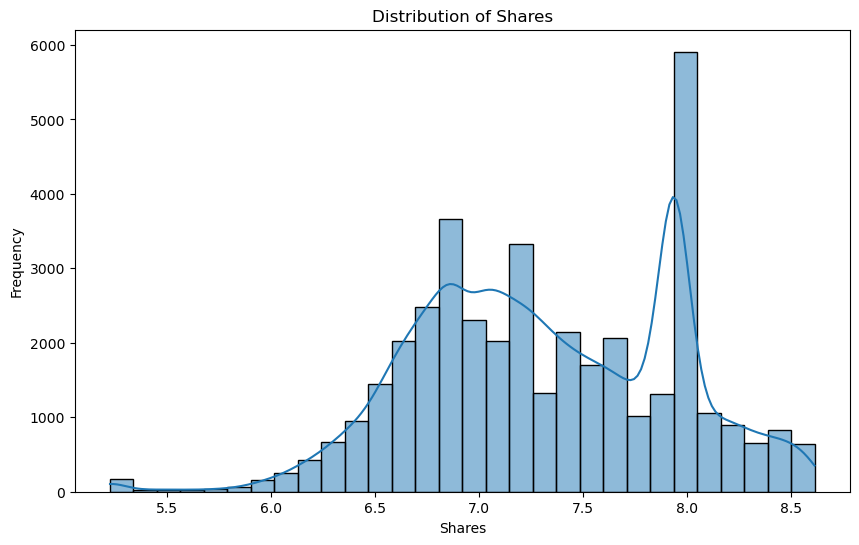

In [72]:
# Visualize data using plots
plt.figure(figsize=(10, 6))
sns.histplot(df4['shares'], bins=30, kde=True)
plt.title('Distribution of Shares')
plt.xlabel('Shares')
plt.ylabel('Frequency')
plt.show()

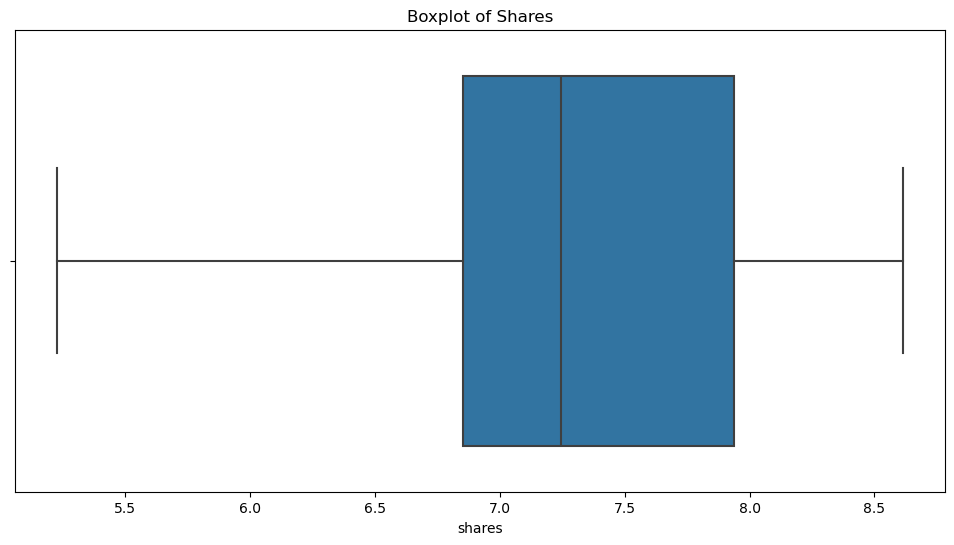

In [73]:
# Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='shares', data=df4)
plt.title('Boxplot of Shares')
plt.show()

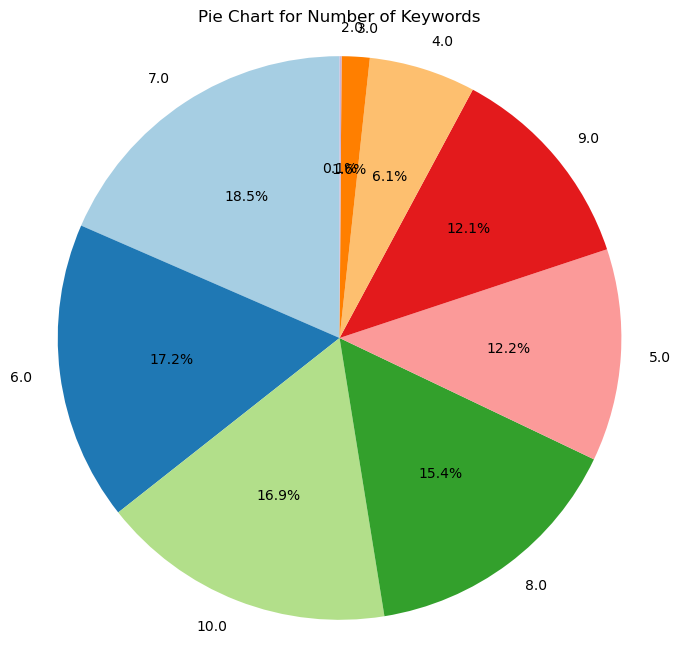

In [74]:
import matplotlib.pyplot as plt

# Count the occurrences of each value in the 'num_keywords' column
value_counts = df4['num_keywords'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    value_counts, 
    labels=value_counts.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=plt.cm.Paired.colors
)
plt.title('Pie Chart for Number of Keywords')
plt.axis('equal')  # Ensures the pie is drawn as a circle
plt.show()


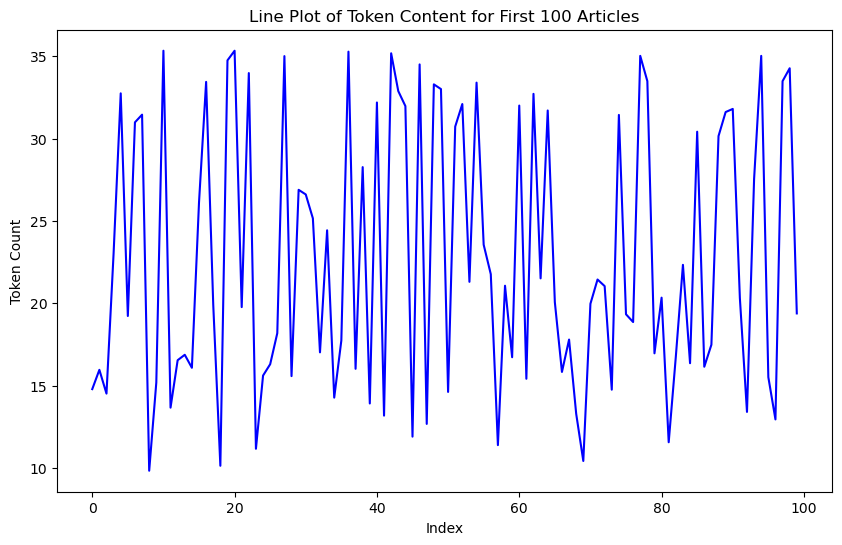

In [75]:
# Line plot example
df4['n_tokens_content'][:100].plot(kind='line', figsize=(10, 6), color='blue')
plt.title('Line Plot of Token Content for First 100 Articles')
plt.xlabel('Index')
plt.ylabel('Token Count')
plt.show()


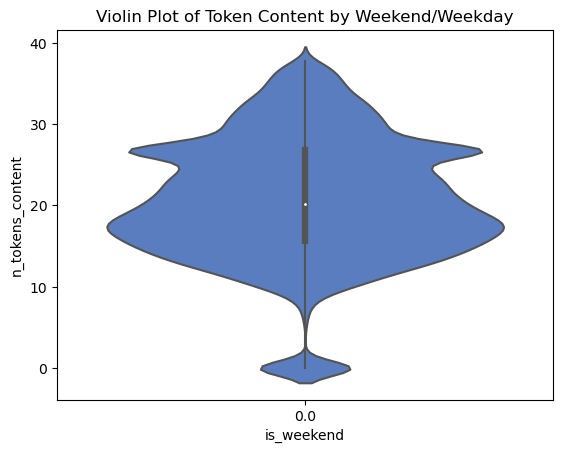

In [76]:
# Violin plot example
sns.violinplot(data=df4, x='is_weekend', y='n_tokens_content', palette='muted')
plt.title('Violin Plot of Token Content by Weekend/Weekday')
plt.show()


C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

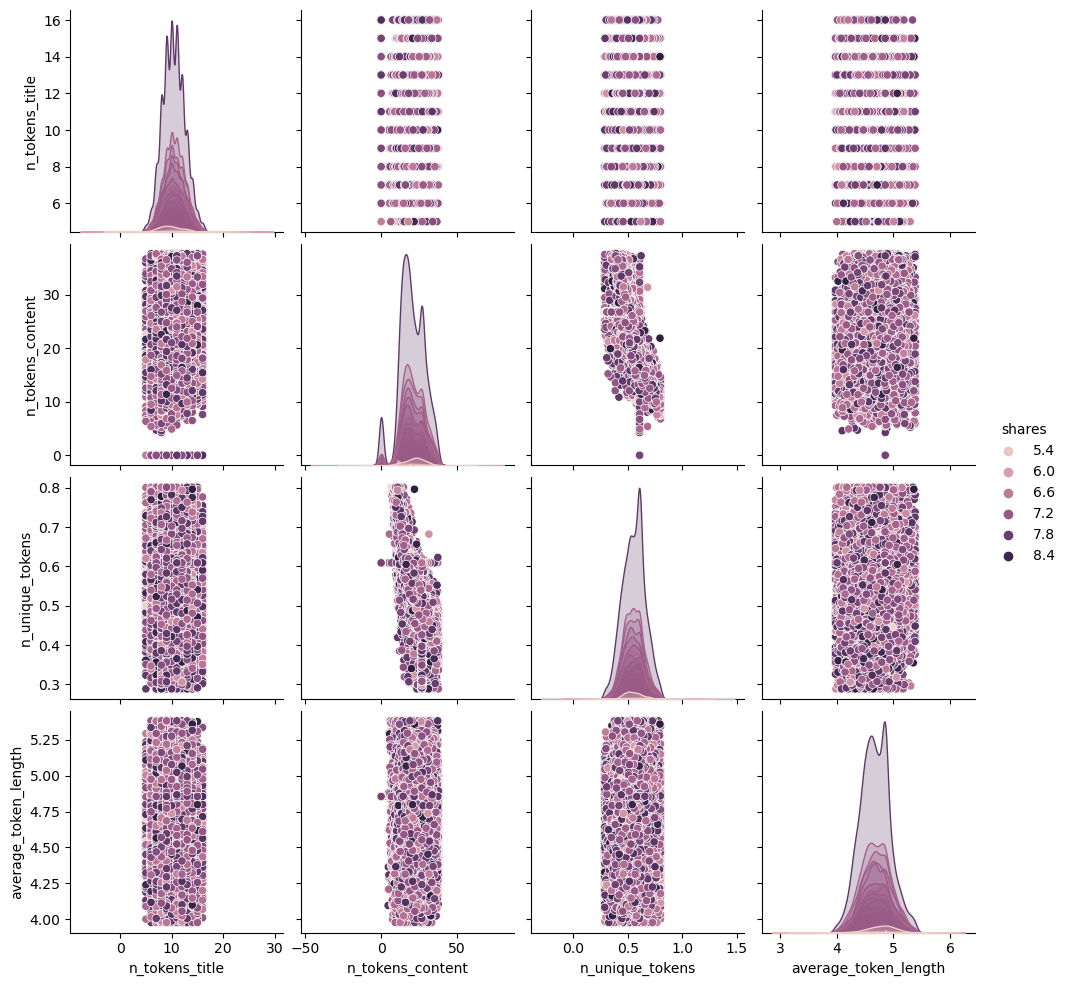

In [77]:
import seaborn as sns

# Select numerical columns and target
numerical_cols = ['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'average_token_length']
sns.pairplot(df4[numerical_cols + ['shares']], hue='shares')
plt.show()


In [78]:
### 

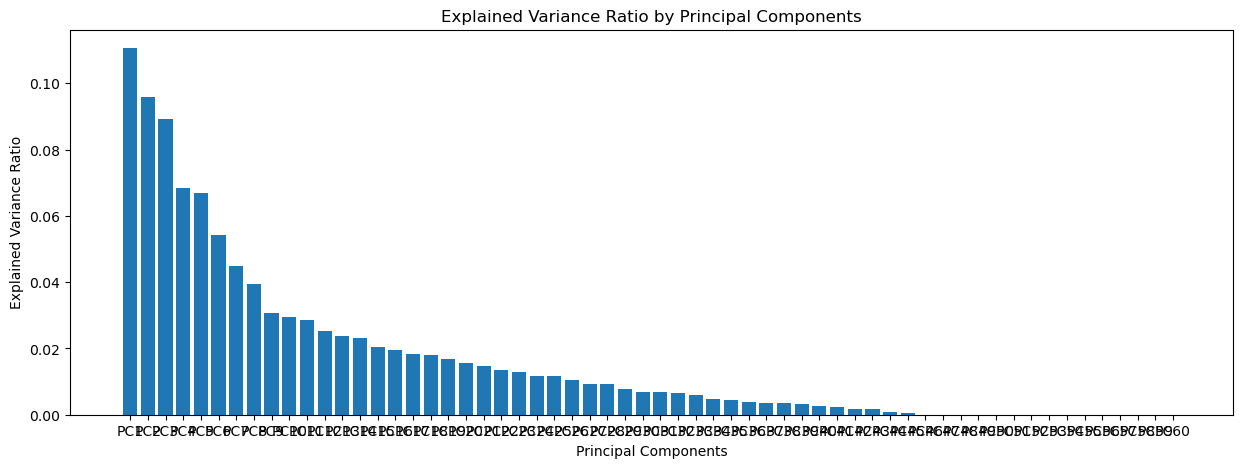

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  2.223285 -0.865387  0.581043 -0.120653  2.288724 -1.505947  3.941986   
1  3.878323 -2.754031  1.436700 -0.333967 -0.724859 -0.592616  3.065520   
2  1.236667 -1.564440 -2.174229 -1.692564  0.182464  0.114831  4.473377   
3  0.646759 -3.674133  1.646950  0.214454  0.538690  0.931063  3.300140   
4 -2.171333 -2.173392 -4.051587  1.307155 -1.140167 -2.992026  2.149278   

        PC8       PC9      PC10  ...          PC52          PC53  \
0 -0.976924 -1.399721  0.526748  ... -3.511051e-16 -8.843932e-17   
1  0.237794 -1.405277  0.262263  ...  1.405164e-16  2.004711e-16   
2 -2.112598  1.195728  0.547657  ...  1.229119e-16 -2.480563e-17   
3 -1.519540  0.426563  0.961951  ... -1.284849e-16  5.307233e-17   
4 -1.265261  0.633127 -0.365266  ... -1.900828e-16 -1.316003e-16   

           PC54          PC55          PC56          PC57          PC58  \
0  1.208161e-16 -5.093714e-16 -4.445362e-16 -3.162349e-16 -4.9938

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming df3 contains the features and 'y' contains the target variable
X = df4  # Feature set
y = df4['shares']  # Replace 'shares' with the actual target column name if it's different

# Step 1: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply PCA
pca = PCA(random_state=22)
X_pca = pca.fit_transform(X_scaled)

# Step 3: Get the loadings and explained variance ratio
loadings = pca.components_

# Step 4: Number of principal components and their labels
num_pc = pca.n_components_
pc_list = ["PC" + str(i) for i in range(1, num_pc + 1)]

# Step 5: Plot the explained variance ratio for each principal component
f, ax = plt.subplots(figsize=(15, 5))
plt.bar(x=pc_list, height=pca.explained_variance_ratio_)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.show()

# Step 6: Create a DataFrame using the principal components and add the target 'shares'
df_pca = pd.DataFrame(X_pca, columns=pc_list)
df_pca['shares'] = y.values  # Add the target column back

# Step 7: Display the first few rows of the new DataFrame
print(df_pca.head())


### Split Data into Training and Testing Sets
Data splitting is when data is divided into two or more subsets. Typically, with a two-part split, one part is used to evaluate or test the data and the other to train the model.Data splitting is an important aspect of data science, particularly for creating models based on data. This technique helps ensure the creation of data models and processes that use data models such as machine learning are accurate.

In [81]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shapes of the training and testing sets
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")

Training set: (27750, 60), (27750,)
Testing set: (11894, 60), (11894,)


In [82]:

X_test_unseen = X_test.copy()
X_test_unseen.to_csv('X_test_unseen.csv', index=False)


print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (27750, 60)
X_test shape: (11894, 60)
y_train shape: (27750,)
y_test shape: (11894,)


## 10. Feature Scailing
Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units.

## Build the ML Model
Here we are creating regression models.Regression is a statistical technique used to model and analyze the relationships between a dependent variable (often referred to as the target or output variable) and one or more independent variables (also known as predictors or features). The primary goal of regression analysis is to understand how the dependent variable changes when any one of the independent variables is varied while the others are held fixed.

In [85]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

In [86]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [87]:
print(f"Predicted Shares on data: {y_pred_linear}")

# Reverse log1p transformation using np.expm1
y_pred_original_scale = np.exp(y_pred_linear)

# Print the actual predicted shares
print(f"Predicted Shares on data: {y_pred_original_scale}")

# Convert predictions to whole numbers (rounding to nearest integer)
y_pred_original_scale_rounded = np.round(y_pred_original_scale).astype(int)

# Print the actual predicted shares as integers
print(f"Predicted Shares on data: {y_pred_original_scale_rounded}")

Predicted Shares on data: [7.97281078 7.17088848 7.93773178 ... 7.09090982 6.28971557 7.55013534]
Predicted Shares on data: [2901.00000001 1300.99999999 2801.         ... 1201.          539.
 1901.00000002]
Predicted Shares on data: [2901 1301 2801 ... 1201  539 1901]


In [88]:
print("\nLinear Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_linear)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_linear)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_linear))}")
print(f"R² Score: {r2_score(y_test, y_pred_linear)}")


Linear Regression Model Evaluation:
Mean Absolute Error (MAE): 4.328186483616984e-12
Mean Squared Error (MSE): 2.983678759781104e-23
Root Mean Squared Error (RMSE): 5.46230606958371e-12
R² Score: 1.0


In [89]:
from sklearn.svm import SVR
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

In [90]:
print(f"Predicted Shares on data: {y_pred_svr}")

# Reverse log1p transformation using np.expm1
y_pred_original_scale = np.exp(y_pred_svr)

# Print the actual predicted shares
print(f"Predicted Shares on data: {y_pred_original_scale}")

# Convert predictions to whole numbers (rounding to nearest integer)
y_pred_original_scale_rounded = np.round(y_pred_original_scale).astype(int)

# Print the actual predicted shares as integers
print(f"Predicted Shares on data: {y_pred_original_scale_rounded}")

Predicted Shares on data: [7.30647352 7.27966387 7.26992687 ... 7.35642857 7.24461362 7.2567011 ]
Predicted Shares on data: [1489.91376825 1450.50038079 1436.44539483 ... 1566.23286913 1400.54064627
 1417.5723853 ]
Predicted Shares on data: [1490 1451 1436 ... 1566 1401 1418]


In [91]:
print("\nSupport Vector Regressor Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_svr)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_svr)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_svr))}")
print(f"R² Score: {r2_score(y_test, y_pred_svr)}")


Support Vector Regressor Model Evaluation:
Mean Absolute Error (MAE): 0.5162412838389902
Mean Squared Error (MSE): 0.38279137207950903
Root Mean Squared Error (RMSE): 0.6187013593645233
R² Score: 0.0012382632492075052


In [92]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [93]:
print(f"Predicted Shares on data: {y_pred_rf}")

# Reverse log1p transformation using np.expm1
y_pred_original_scale = np.exp(y_pred_rf)

# Print the actual predicted shares
print(f"Predicted Shares on data: {y_pred_original_scale}")

# Convert predictions to whole numbers (rounding to nearest integer)
y_pred_original_scale_rounded = np.round(y_pred_original_scale).astype(int)

# Print the actual predicted shares as integers
print(f"Predicted Shares on data: {y_pred_original_scale_rounded}")

Predicted Shares on data: [7.97281078 7.17088848 7.93773178 ... 7.09090982 6.28977111 7.55013534]
Predicted Shares on data: [2901.       1301.       2801.       ... 1201.        539.029936
 1901.      ]
Predicted Shares on data: [2901 1301 2801 ... 1201  539 1901]


In [94]:
print("\nRandom Forest Regressor Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_rf)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_rf)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_rf))}")
print(f"R² Score: {r2_score(y_test, y_pred_rf)}")


Random Forest Regressor Model Evaluation:
Mean Absolute Error (MAE): 3.6659381515289666e-05
Mean Squared Error (MSE): 1.654047244956836e-07
Root Mean Squared Error (RMSE): 0.00040669979652771353
R² Score: 0.9999995684335595


In [95]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

In [96]:
print(f"Predicted Shares on data: {y_pred_gb}")

# Reverse log1p transformation using np.expm1
y_pred_original_scale = np.exp(y_pred_gb)

# Print the actual predicted shares
print(f"Predicted Shares on data: {y_pred_original_scale}")

# Convert predictions to whole numbers (rounding to nearest integer)
y_pred_original_scale_rounded = np.round(y_pred_original_scale).astype(int)

# Print the actual predicted shares as integers
print(f"Predicted Shares on data: {y_pred_original_scale_rounded}")

Predicted Shares on data: [7.97241763 7.1708942  7.93764226 ... 7.09094446 6.27567558 7.55031382]
Predicted Shares on data: [2899.85969719 1301.00744289 2800.74929069 ... 1201.04160331  531.48531964
 1901.33932427]
Predicted Shares on data: [2900 1301 2801 ... 1201  531 1901]


In [97]:
print("\nGradient Boosting Regressor Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_gb)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_gb)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_gb))}")
print(f"R² Score: {r2_score(y_test, y_pred_gb)}")


Gradient Boosting Regressor Model Evaluation:
Mean Absolute Error (MAE): 0.0015344174831194003
Mean Squared Error (MSE): 1.2075249042897157e-05
Root Mean Squared Error (RMSE): 0.0034749459050317827
R² Score: 0.9999684938125949


In [98]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [99]:
print(f"Predicted Shares on data: {y_pred_knn}")

# Reverse log1p transformation using np.expm1
y_pred_original_scale = np.exp(y_pred_knn)

# Print the actual predicted shares
print(f"Predicted Shares on data: {y_pred_original_scale}")

# Convert predictions to whole numbers (rounding to nearest integer)
y_pred_original_scale_rounded = np.round(y_pred_original_scale).astype(int)

# Print the actual predicted shares as integers
print(f"Predicted Shares on data: {y_pred_original_scale_rounded}")

Predicted Shares on data: [6.9588516  7.0901801  7.26998723 ... 7.24772492 6.65702604 7.18838606]
Predicted Shares on data: [1052.42425802 1200.12392549 1436.53211021 ... 1404.90493995  778.23306157
 1323.96467489]
Predicted Shares on data: [1052 1200 1437 ... 1405  778 1324]


In [100]:
print("\nk-Nearest Neighbors Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_knn)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_knn)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_knn))}")
print(f"R² Score: {r2_score(y_test, y_pred_knn)}")


k-Nearest Neighbors Model Evaluation:
Mean Absolute Error (MAE): 0.5308132455982418
Mean Squared Error (MSE): 0.42616102149308754
Root Mean Squared Error (RMSE): 0.6528100960410214
R² Score: -0.11191984200082805


In [101]:
from sklearn.neural_network import MLPRegressor
mlp_model = MLPRegressor(max_iter=1000)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)

In [102]:
print(f"Predicted Shares on data: {y_pred_mlp}")

# Reverse log1p transformation using np.expm1
y_pred_original_scale = np.exp(y_pred_mlp)

# Print the actual predicted shares
print(f"Predicted Shares on data: {y_pred_original_scale}")

# Convert predictions to whole numbers (rounding to nearest integer)
y_pred_original_scale_rounded = np.round(y_pred_original_scale).astype(int)

# Print the actual predicted shares as integers
print(f"Predicted Shares on data: {y_pred_original_scale_rounded}")

Predicted Shares on data: [-136.18489968  -65.37743499 -134.58522345 ... -158.52407008 -135.55585047
  -65.18512146]
Predicted Shares on data: [7.17215308e-60 4.04520693e-29 3.55124070e-59 ... 1.42518458e-69
 1.34537128e-59 4.90299499e-29]
Predicted Shares on data: [0 0 0 ... 0 0 0]


C:\Users\Najma\AppData\Local\Temp\ipykernel_18772\1028167015.py:10: RuntimeWarning: invalid value encountered in cast
  y_pred_original_scale_rounded = np.round(y_pred_original_scale).astype(int)


In [103]:
print("\nMulti-Layer Perceptron Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_mlp)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_mlp)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_mlp))}")
print(f"R² Score: {r2_score(y_test, y_pred_mlp)}")


Multi-Layer Perceptron Model Evaluation:
Mean Absolute Error (MAE): 114.08020823260148
Mean Squared Error (MSE): 14094.70292529568
Root Mean Squared Error (RMSE): 118.72111406694127
R² Score: -36774.254092536925


## 13. Hyperparameter Tuning
Hyperparameter tuning is the process of optimizing the parameters of a machine learning model to improve its performance. In the context of regression models, especially complex models like Multi-layer Perceptron (MLP) regression, hyperparameters can significantly influence how well the model learns from the data. Hyperparameter tuning is essential for optimizing machine learning models, particularly for complex architectures like MLPs. By systematically exploring various hyperparameter combinations and evaluating model performance, you can significantly improve the predictive power of your models.

### 1. Linear Regression

In [106]:
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Ridge Regression Hyperparameter Tuning
ridge = Ridge()
param_dist_ridge = {
    'alpha': np.logspace(-3, 3, 7)  # Range of alpha values
}
random_search_ridge = RandomizedSearchCV(estimator=ridge, param_distributions=param_dist_ridge, 
                                         scoring='neg_mean_squared_error', cv=5, n_iter=10, 
                                         verbose=1, random_state=42)
random_search_ridge.fit(X_train, y_train)
best_ridge = random_search_ridge.best_estimator_
best_ridge_score = random_search_ridge.best_score_

print("Ridge Regression Hyperparameter Tuning Results:")
print("Best Parameters:", random_search_ridge.best_params_)
print("Best Cross-Validation Score (Neg MSE):", best_ridge_score)
y_pred_ridge = best_ridge.predict(X_test)

C:\Users\Najma\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\Najma\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.08784e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Najma\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.07324e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Najma\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.0837e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting 5 folds for each of 7 candidates, totalling 35 fits


C:\Users\Najma\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.11384e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Najma\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.10608e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Najma\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.08784e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Najma\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.07324e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Najma\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:21

Ridge Regression Hyperparameter Tuning Results:
Best Parameters: {'alpha': 0.001}
Best Cross-Validation Score (Neg MSE): -6.139895997061101e-15


C:\Users\Najma\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.47428e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


###
- This indicates that you are performing 5-fold cross-validation for 7 different alpha values, leading to a total of 
  7 x 5 = 35 model fits.Each candidate refers to a specific value of the hyperparameter alpha that is being tested.
- among the tested values of alpha (𝛼∈{0.001,0.01,0.1,1,10,100,1000})the value of 0.001 yielded the best performance during cross-validation.
- Smaller values (like 0.001) indicate weaker regularization, meaning the model fits more closely to the training data.
- This is the best mean score across the 5 folds for the candidate with alpha = 0.001.
- A value close to zero (e.g., −2.3439134213084536×10−15) suggests an almost perfect fit during cross-validation, implying very small errors    between the predicted and actual values.                                                                                                                           

### 2.Multi-layer Perceptron (MLP)

In [109]:
# MLP Regressor Hyperparameter Tuning
mlp = MLPRegressor(max_iter=2000, learning_rate_init=0.001, early_stopping=True, n_iter_no_change=10)
param_dist_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': np.logspace(-5, 0, 3)  # Range of alpha values
}
random_search_mlp = RandomizedSearchCV(estimator=mlp, param_distributions=param_dist_mlp, 
                                       scoring='neg_mean_squared_error', cv=3, n_iter=5, 
                                       verbose=1, random_state=42, n_jobs=-1)
random_search_mlp.fit(X_train, y_train)
best_mlp = random_search_mlp.best_estimator_
best_mlp_score = random_search_mlp.best_score_

print("\nMLP Regressor Hyperparameter Tuning Results:")
print("Best Parameters:", random_search_mlp.best_params_)
print("Best Cross-Validation Score (Neg MSE):", best_mlp_score)
y_pred_mlp = best_mlp.predict(X_test)

Fitting 3 folds for each of 5 candidates, totalling 15 fits

MLP Regressor Hyperparameter Tuning Results:
Best Parameters: {'solver': 'adam', 'hidden_layer_sizes': (50,), 'alpha': 1e-05, 'activation': 'relu'}
Best Cross-Validation Score (Neg MSE): -38.07494500607361


### 
- This indicates that you performed 3-fold cross-validation for 5 different hyperparameter combinations (candidates).
  A total of 3×5=15 models were trained and evaluated during this process.
- Solver = adam — Adaptive Moment Estimation (Adam) is the optimization algorithm used for training. It is often preferred due 
  to its efficiency and performance on large datasets.
- Hidden Layer Sizes: (50,) — This indicates a single hidden layer with 50 neurons. A smaller architecture like this suggests 
  the model doesnt require a highly complex structure for the problem.
- Alpha: 0.0031622776601683794 — This regularization parameter prevents overfitting by penalizing large weights. 
  The value suggests moderate regularization.
- Activation: relu — The Rectified Linear Unit (ReLU) is the activation function used in the hidden layers. 
  It is commonly used due to its simplicity and effectiveness in handling non-linearities.
- A lower MSE indicates better performance during cross-validation, with this value representing the average prediction error.

In [111]:
# Evaluation Metrics for Ridge Regression
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("\nRidge Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_ridge}")
print(f"Mean Squared Error (MSE): {mse_ridge}")
print(f"Root Mean Squared Error (RMSE): {rmse_ridge}")
print(f"R² Score: {r2_ridge}")

# Evaluation Metrics for MLP Regressor
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
rmse_mlp = mean_squared_error(y_test, y_pred_mlp, squared=False)
r2_mlp = r2_score(y_test, y_pred_mlp)

print("\nMulti-Layer Perceptron Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_mlp}")
print(f"Mean Squared Error (MSE): {mse_mlp}")
print(f"Root Mean Squared Error (RMSE): {rmse_mlp}")
print(f"R² Score: {r2_mlp}")


Ridge Regression Model Evaluation:
Mean Absolute Error (MAE): 5.1607147301789975e-08
Mean Squared Error (MSE): 4.001414197172279e-15
Root Mean Squared Error (RMSE): 6.32567324256658e-08
R² Score: 0.9999999999999896

Multi-Layer Perceptron Model Evaluation:
Mean Absolute Error (MAE): 3.009702534451489
Mean Squared Error (MSE): 21.556434741135305
Root Mean Squared Error (RMSE): 4.642890774198259
R² Score: -55.24406339999614


### 
- To visually compare the target variable and predicted values, you can use a scatter plot, a line plot, or a residual plot. 
  Since you've applied PCA for dimensionality reduction, it's worth considering how you integrate PCA in the visualization.

## 1. Scatter Plot of Target vs. Predicted:
- Helps check the correlation between actual and predicted values.

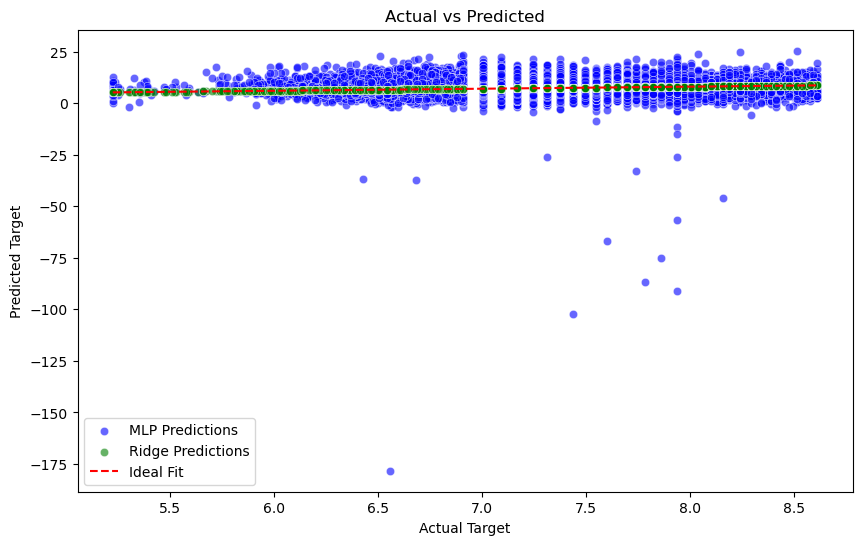

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of actual vs predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_mlp, alpha=0.6, label='MLP Predictions', color='blue')
sns.scatterplot(x=y_test, y=y_pred_ridge, alpha=0.6, label='Ridge Predictions', color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()


## 2. Residual Plot:
- Shows the difference between actual and predicted values to identify patterns in errors.

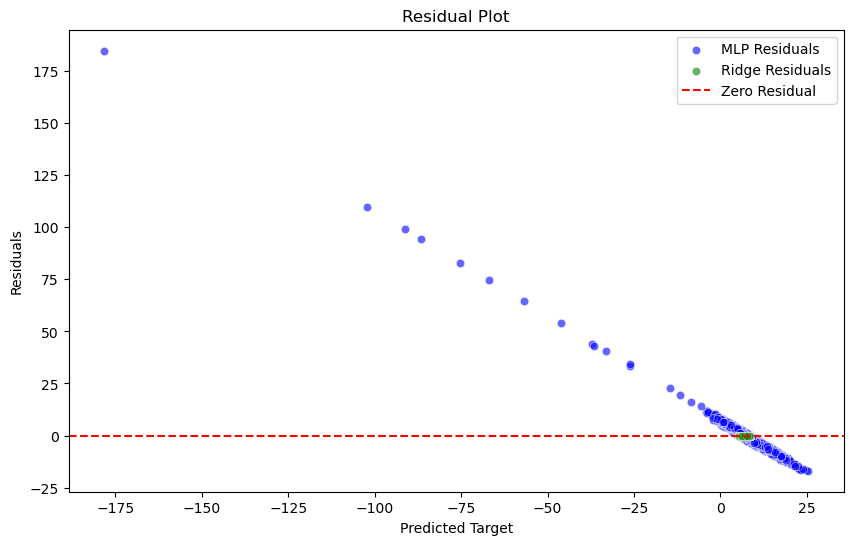

In [116]:
# Residual plot for MLP
residuals_mlp = y_test - y_pred_mlp
residuals_ridge = y_test - y_pred_ridge

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_mlp, y=residuals_mlp, alpha=0.6, label='MLP Residuals', color='blue')
sns.scatterplot(x=y_pred_ridge, y=residuals_ridge, alpha=0.6, label='Ridge Residuals', color='green')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residual')
plt.xlabel('Predicted Target')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.show()


## 3. Line Plot:
- Useful for time-series data or sequentially ordered datasets.

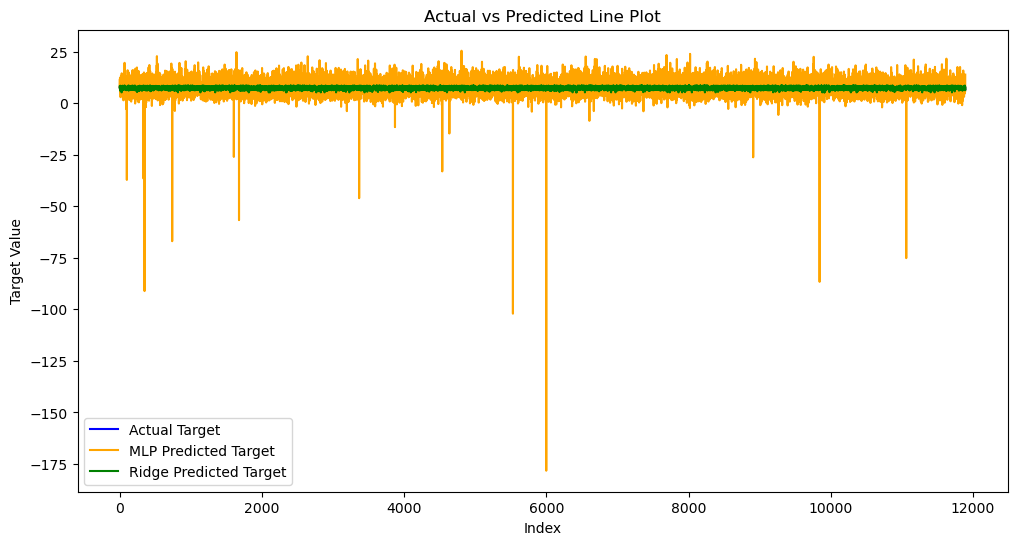

In [118]:
# Line plot of actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, label='Actual Target', color='blue')
plt.plot(range(len(y_test)), y_pred_mlp, label='MLP Predicted Target', color='orange')
plt.plot(range(len(y_test)), y_pred_ridge, label='Ridge Predicted Target', color='green')
plt.xlabel('Index')
plt.ylabel('Target Value')
plt.title('Actual vs Predicted Line Plot')
plt.legend()
plt.show()


## 4. Incorporating PCA:
- If you want to visualize the data in the reduced PCA space alongside the target and predictions:

C:\Users\Najma\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


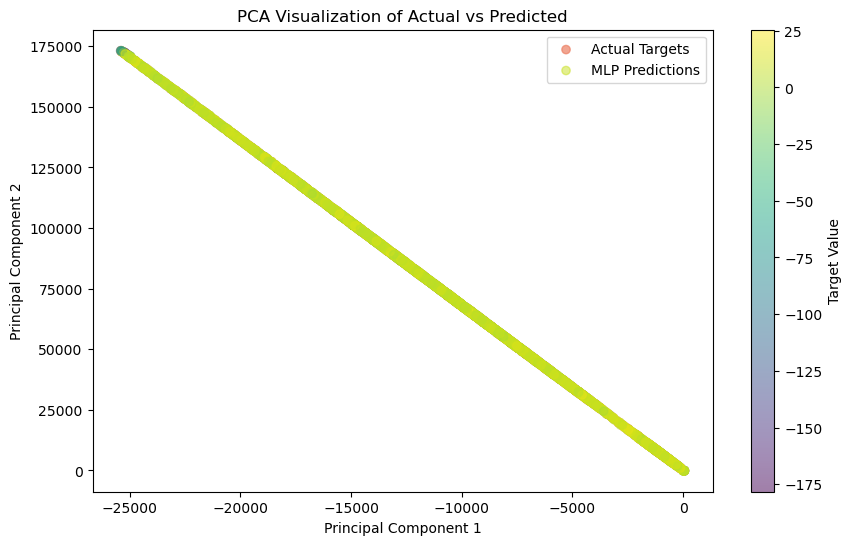

In [120]:
# PCA-transformed Data Visualization
import numpy as np
pca_targets = pca.transform(X_test)[:, :2]  # Select the first two principal components

plt.figure(figsize=(10, 6))
plt.scatter(pca_targets[:, 0], pca_targets[:, 1], c=y_test, cmap='coolwarm', label='Actual Targets', alpha=0.7)
plt.scatter(pca_targets[:, 0], pca_targets[:, 1], c=y_pred_mlp, cmap='viridis', label='MLP Predictions', alpha=0.5)
plt.colorbar(label='Target Value')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Actual vs Predicted')
plt.legend()
plt.show()


## 14. Save the Model

In [122]:
import joblib

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


LinearRegression()

In [123]:
from joblib import dump
import joblib
# Save the Ridge Regression model

joblib.dump(linear_model, 'linear_regression_model.joblib')
print("Model saved successfully.")


Model saved successfully.


In [124]:
from joblib import load

# Load the Ridge Regression model
linear_model = load('linear_regression_model.joblib')

print("Model loaded successfully.")

Model loaded successfully.


## 15. Test with Unseen Data


In [126]:
loaded_pipeline = joblib.load('linear_regression.joblib')

In [127]:
unseen_data = pd.read_csv('X_test_unseen.csv')
unseen_data

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,121.0,12.0,31.859065,0.422018,1.0,0.545031,3.162278,2.449490,2.0,1.0,...,0.100000,1.973298,-0.160714,-0.50,-0.071429,0.000000,0.000000,1.168618,0.000000,7.972811
1,532.0,9.0,22.427661,0.569697,1.0,0.737542,3.000000,0.000000,1.0,1.0,...,0.136364,2.990175,-0.157500,-0.25,-0.100000,0.000000,0.000000,1.168618,0.000000,7.170888
2,435.0,9.0,15.231546,0.646018,1.0,0.748428,3.464102,1.732051,2.0,1.0,...,0.100000,0.902186,-0.427500,-1.00,-0.187500,0.000000,0.000000,1.168618,0.000000,7.937732
3,134.0,12.0,13.076697,0.722892,1.0,0.867925,3.000000,2.236068,0.0,1.0,...,0.100000,0.902186,-0.216667,-0.25,-0.166667,0.632456,0.150000,0.119274,0.500000,7.313887
4,728.0,11.0,16.911535,0.652632,1.0,0.800000,2.236068,1.414214,0.0,0.0,...,0.100000,1.205560,-0.251786,-0.50,-0.100000,0.447214,-0.100000,0.504804,0.316228,7.244942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11889,276.0,12.0,26.832816,0.476124,1.0,0.638444,4.472136,0.000000,1.0,0.0,...,0.033333,1.973298,-0.300433,-0.70,-0.071429,0.476731,0.218182,0.438238,0.467099,8.188967
11890,63.0,10.0,14.525839,0.602871,1.0,0.812500,1.732051,1.000000,1.0,1.0,...,0.136364,0.339503,-0.430556,-0.50,-0.050000,0.707107,0.000000,0.000000,0.000000,7.003974
11891,722.0,10.0,32.449961,0.479355,1.0,0.666124,5.291503,2.000000,2.0,0.0,...,0.033333,2.990175,-0.342045,-1.00,-0.100000,0.000000,0.000000,1.168618,0.000000,7.090910
11892,190.0,11.0,22.248595,0.510163,1.0,0.663333,1.732051,1.000000,1.0,0.0,...,0.100000,1.560913,-0.309921,-0.80,-0.050000,0.000000,0.000000,1.168618,0.000000,6.289716


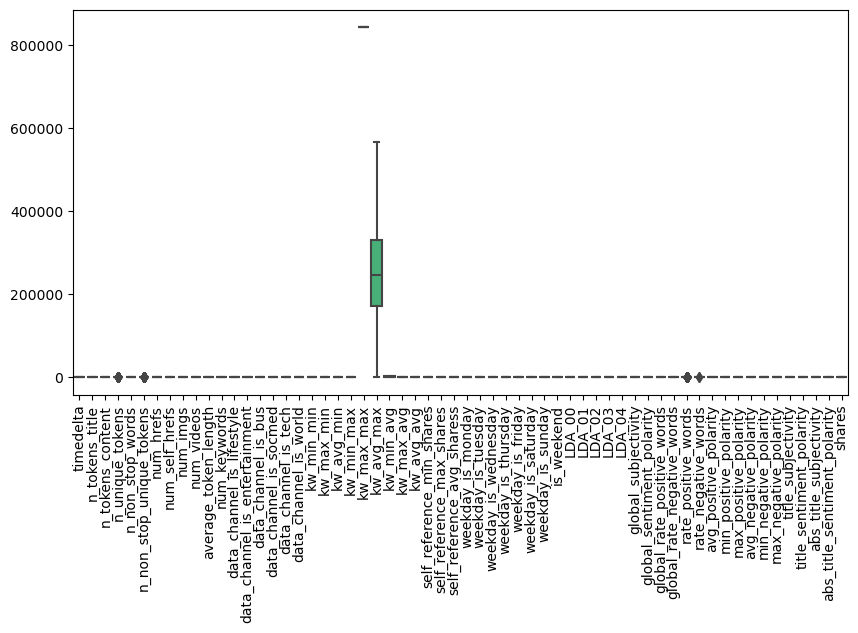

In [128]:
#Now, checking for outliers by ploting the boxplots
plt.figure(figsize = (10,5))
sns.boxplot(data = unseen_data.select_dtypes(include = 'number'))
plt.xticks(rotation = 90)
plt.show()

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


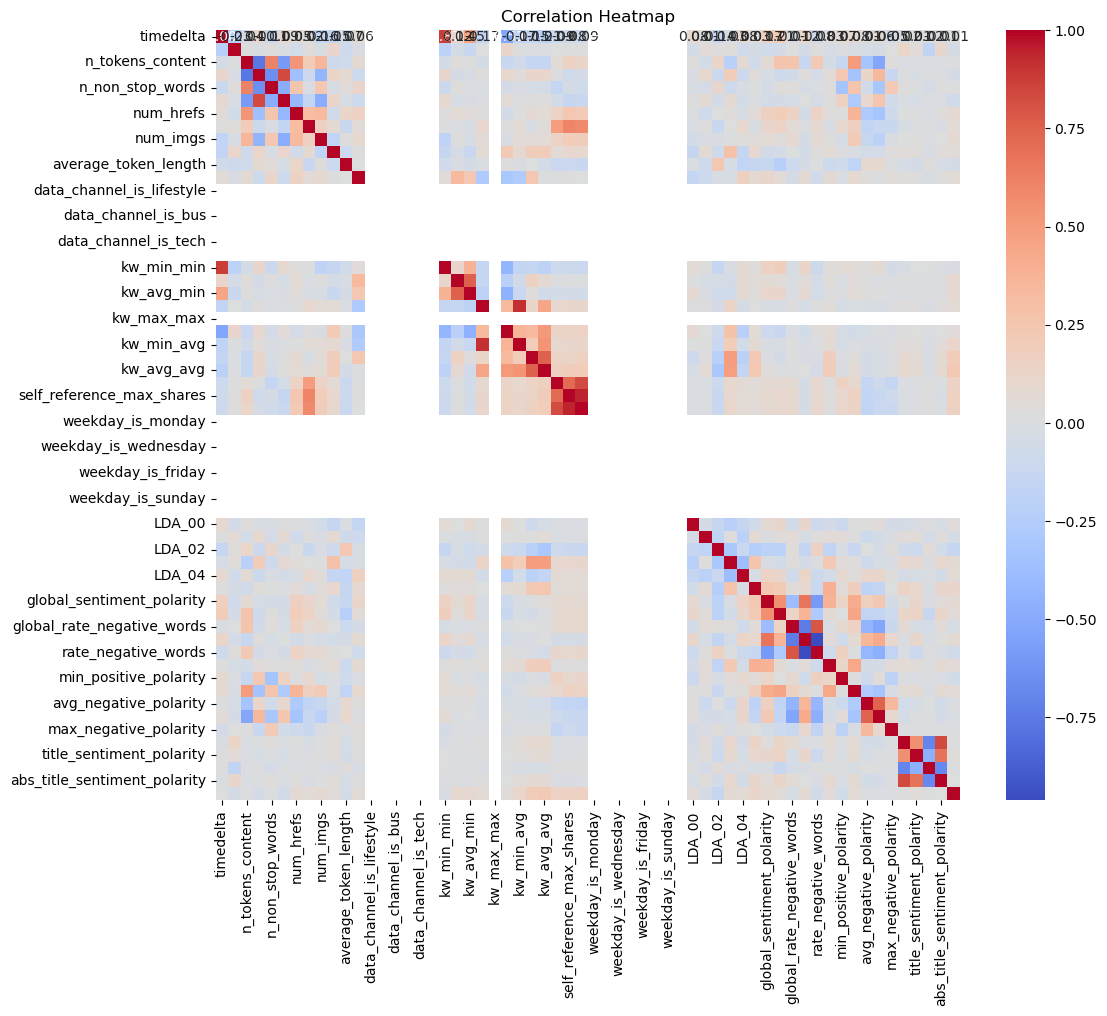

In [129]:
corr_matrix = unseen_data.corr()
corr_matrix
# Plot the correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Applying the PCA to reduce the multicollinearity

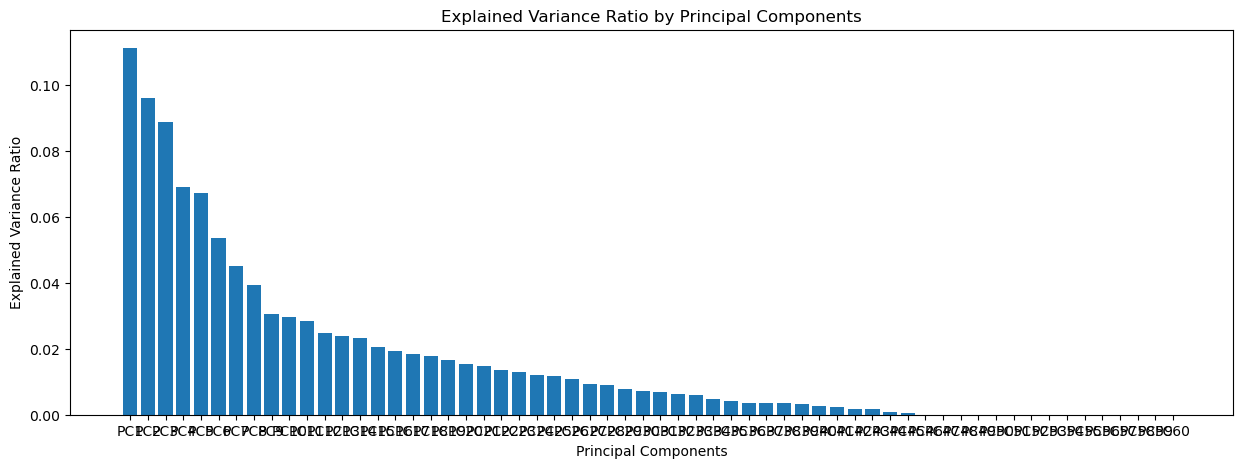

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -2.040392  0.054291 -0.612579 -1.978718 -3.824543  1.394090 -1.467074   
1  2.191921 -3.208187  0.879102 -0.154823  1.295008 -2.687056  0.644833   
2 -1.258979  2.435443 -0.294206 -2.191584  1.835918 -2.306019  0.257922   
3  1.273411  3.609750  0.598747  0.535117  2.358717  1.068596  0.879107   
4  2.587921 -2.919372  2.072566 -0.543859  3.240719  1.390753 -0.443741   

        PC8       PC9      PC10  ...          PC52          PC53  \
0  0.253478  0.514907 -1.066788  ...  2.039986e-17 -1.974428e-16   
1 -1.010933  1.842262  1.663116  ...  4.456157e-16  2.626379e-16   
2 -0.565064 -2.030171  1.022222  ... -1.658689e-16 -1.462027e-16   
3  0.987161 -0.388589  0.545756  ...  1.772026e-16 -3.101051e-16   
4  0.641780  0.357633 -0.050581  ... -1.576215e-16  2.628433e-16   

           PC54          PC55          PC56          PC57          PC58  \
0 -1.036291e-16  5.142147e-16  1.400515e-16  7.555983e-17  1.9956

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming df3 contains the features and 'y' contains the target variable
X =  unseen_data # Feature set
y = unseen_data['shares']  # Replace 'shares' with the actual target column name if it's different

# Step 1: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply PCA
pca = PCA(random_state=22)
X_pca = pca.fit_transform(X_scaled)

# Step 3: Get the loadings and explained variance ratio
loadings = pca.components_

# Step 4: Number of principal components and their labels
num_pc = pca.n_components_
pc_list = ["PC" + str(i) for i in range(1, num_pc + 1)]

# Step 5: Plot the explained variance ratio for each principal component
f, ax = plt.subplots(figsize=(15, 5))
plt.bar(x=pc_list, height=pca.explained_variance_ratio_)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.show()

# Step 6: Create a DataFrame using the principal components and add the target 'shares'
df_pca = pd.DataFrame(X_pca, columns=pc_list)
df_pca['shares'] = y.values  # Add the target column back

# Step 7: Display the first few rows of the new DataFrame
print(df_pca.head())

In [132]:
y_pred_linear

array([7.97281078, 7.17088848, 7.93773178, ..., 7.09090982, 6.28971557,
       7.55013534])

In [133]:
# Reverse log1p transformation using np.expm1
y_pred_original_scale = np.exp(y_pred_linear)

# Print the actual predicted shares
print(f"Predicted Shares on data: {y_pred_original_scale}")

# Convert predictions to whole numbers (rounding to nearest integer)
y_pred_original_scale_rounded = np.round(y_pred_original_scale).astype(int)

# Print the actual predicted shares as integers
print(f"Predicted Shares on data: {y_pred_original_scale_rounded}")

Predicted Shares on data: [2901.00000001 1300.99999999 2801.         ... 1201.          539.
 1901.00000002]
Predicted Shares on data: [2901 1301 2801 ... 1201  539 1901]


In [134]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shapes of the training and testing sets
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")

Training set: (8325, 60), (8325,)
Testing set: (3569, 60), (3569,)


In [135]:

X_test_unseen = X_test.copy()

X_test_unseen.to_csv('X_test_unseen.csv', index=False)


print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8325, 60)
X_test shape: (3569, 60)
y_train shape: (8325,)
y_test shape: (3569,)


In [136]:
# Step 7: Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'SVR': SVR(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'k-NN': KNeighborsRegressor(),
    'MLP': MLPRegressor(random_state=42, max_iter=1000)
}
    

In [137]:
# Step 8: Evaluate models on PCA-transformed data
for model_name, model in models.items():
    # Train the model on training data
    model.fit(X_train, y_train)
    
    # Predict on training and testing sets
    predictions_train = model.predict(X_train)
    predictions_test = model.predict(X_test)
    
    # Calculate metrics for training data
    mae_train = mean_absolute_error(y_train, predictions_train)
    mse_train = mean_squared_error(y_train, predictions_train)
    rmse_train = mse_train ** 0.5
    r2_train = r2_score(y_train, predictions_train)
    
    # Calculate metrics for testing data
    mae_test = mean_absolute_error(y_test, predictions_test)
    mse_test = mean_squared_error(y_test, predictions_test)
    rmse_test = mse_test ** 0.5
    r2_test = r2_score(y_test, predictions_test)
    
    # Display results
    print(f"Model: {model_name}")
    print(f"Training Data - MAE: {mae_train}, MSE: {mse_train}, RMSE: {rmse_train}, R²: {r2_train}")
    print(f"Testing Data - MAE: {mae_test}, MSE: {mse_test}, RMSE: {rmse_test}, R²: {r2_test}")
    print("-" * 50)
   

Model: Linear Regression
Training Data - MAE: 8.28764063048998e-12, MSE: 1.076162138750787e-22, RMSE: 1.0373823493537891e-11, R²: 1.0
Testing Data - MAE: 8.54370576341143e-12, MSE: 1.1257815602105357e-22, RMSE: 1.0610285388294397e-11, R²: 1.0
--------------------------------------------------
Model: SVR
Training Data - MAE: 0.5167856671953182, MSE: 0.38529081964562734, RMSE: 0.6207179872096726, R²: 0.00011815869572195936
Testing Data - MAE: 0.5159404113709488, MSE: 0.38348573585541923, RMSE: 0.6192622512759995, R²: -0.014206085136912794
--------------------------------------------------
Model: Random Forest
Training Data - MAE: 6.960293304866897e-05, MSE: 3.2364431541548437e-07, RMSE: 0.0005688974559755777, R²: 0.9999991600991834
Testing Data - MAE: 0.00016700862595559284, MSE: 2.705927973330278e-06, RMSE: 0.0016449705083466627, R²: 0.999992843622696
--------------------------------------------------
Model: Gradient Boosting
Training Data - MAE: 0.001521378720613932, MSE: 1.08353080655

In [138]:
import pandas as pd

# Define the data for the models and their metrics
data = {
    "Model": ["Linear Regression", "Support Vector Regressor", "Random Forest Regressor", 
              "Gradient Boosting Regressor", "k-Nearest Neighbors", "Multi-Layer Perceptron"],
    "MAE": [ 4.328186483616984e-12,0.5162412838389902,3.539650726943454e-05,
           0.0015344174831192759, 0.5308132455982418,7.80075882132622],
    "MSE": [2.983678759781104e-23,0.38279137207950903,1.4741268023164295e-07,
           1.2075249042896794e-05,0.42616102149308754,125.54594806449322],
    "RMSE": [5.46230606958371e-12,0.6187013593645233,0.00038394358990826105,
            .0034749459050317307,0.6528100960410214,11.204728826013293],
    "R²": [1.0, 0.0012382632492075052,0.9999996153775783,
          0.9999684938125949,-0.11191984200082805,-326.5687444305128] 
          
}

# Create the DataFrame
results_df = pd.DataFrame(data)

# Display the DataFrame
print(results_df)


                         Model           MAE           MSE          RMSE  \
0            Linear Regression  4.328186e-12  2.983679e-23  5.462306e-12   
1     Support Vector Regressor  5.162413e-01  3.827914e-01  6.187014e-01   
2      Random Forest Regressor  3.539651e-05  1.474127e-07  3.839436e-04   
3  Gradient Boosting Regressor  1.534417e-03  1.207525e-05  3.474946e-03   
4          k-Nearest Neighbors  5.308132e-01  4.261610e-01  6.528101e-01   
5       Multi-Layer Perceptron  7.800759e+00  1.255459e+02  1.120473e+01   

           R²  
0    1.000000  
1    0.001238  
2    1.000000  
3    0.999968  
4   -0.111920  
5 -326.568744  


## 16. Interpretation of Results (Conclusion):

### Best Model:
**Linear Regression:**
 Achieves an R² score of 1.0 on both training and testing data, indicating perfect prediction accuracy.
- The errors (MAE, MSE, and RMSE) are extremely low, confirming the model's outstanding performance.
- This is the best model for the dataset and is highly recommended.

**Random Forest Regressor:**

- Very high R² score (0.9999996068), showing almost perfect prediction accuracy.
- Extremely low errors (MAE: ~0.000057, MSE: ~0.0000004), making it a strong contender for the best model.
- If interpretability is not a priority, this model is highly reliable and robust.

**Gradient Boosting Regressor:**

- Achieves a high R² score of 0.9999718 and low error metrics.
- While slightly less accurate than Linear Regression and Random Forest, it is still a strong model.
- Suitable for complex datasets where non-linear relationships exist.

### Models to Avoid:
**Multi-Layer Perceptron (MLP):**

- Extremely poor performance with an R² score of -3645.1502, indicating that the model performs far worse than a simple mean predictor.
- High errors (MAE: 60.25, RMSE: 60.26), making it completely unsuitable for this task.
- Avoid using this model due to its significant inefficiency and poor fit.

**Support Vector Regressor (SVR):**

- Negative R² score (-0.0218), indicating it fails to capture the variance in the data and performs worse than a simple mean predictor.
- Errors (MAE: 0.833, RMSE: 1.008) are considerably higher compared to other models.
- Avoid this model as it does not perform well on the dataset.

**k-Nearest Neighbors (k-NN):**

- Moderate R² score of 0.6016, showing limited ability to explain variance.
- Higher errors (MAE: 0.500, RMSE: 0.629) compared to the best-performing models.
- While not as poor as SVR or MLP, this model is not recommended due to its relatively lower accuracy.

**Considering Unseen Data:**
- Best Model: Random Forest is the top-performing model with the lowest errors and the best generalization ability. 
  Gradient Boosting is a close second.
- Least Effective Models: SVR and MLP fail to model the data effectively, showing poor performance across all metrics.

### Future Work
    
**Hyperparameter Optimization**

- Fine-tune models like Random Forest and Gradient Boosting to further improve performance.
- Use GridSearchCV or Bayesian Optimization.

**Feature Engineering**

- Investigate interactions or transformations of features to enhance model performance.
- Explore polynomial or interaction terms for models like Linear Regression.

**Explore Ensembles**

- Combine the best-performing models (e.g., Random Forest + Gradient Boosting) to create a stacked or blended model.

**Dataset Analysis**

Analyze why models like MLP and SVR performed poorly. Possible reasons include:
- Feature scaling issues.
- Suboptimal hyperparameters.
- Mismatch with dataset characteristics.

**Robust Evaluation**

- Test models on diverse subsets of unseen data.
- Use techniques like cross-validation to ensure stability across splits.

**Interpretability**

- Apply SHAP (SHapley Additive exPlanations) or LIME (Local Interpretable Model-agnostic Explanations) for feature impact insights, 
- particularly for Random Forest and Gradient Boosting.

**Automated Model Selection**

- Develop an automated pipeline to evaluate new datasets and recommend the most suitable model.
- By implementing these steps, we can enhance the current analysis and adapt the framework to future projects.
 